In [1]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, sqlite3, pickle, time, datetime, random

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 0. Load Data

In [2]:
data = pickle.load( open('DataFrame_pickles/df_patients_admissions_v3.pickle', 'rb'))
df_patients   = data[0]
df_admissions = data[1]
data = pickle.load( open('DataFrame_pickles/df_haematology_v1.pickle', 'rb'))
df_haematology_old = data[0]
df_haematology_new = pickle.load( open("DataFrame_pickles/new_haematology_3d.pickle", 'rb'))

list_admissions      = df_admissions['admission_id'].unique().tolist()

# 1. Data Check

### 1.1. Admissions

In [3]:
print('Admissions in admissions', len(df_admissions))
print('')

print('Admissions in Haematology_old', len(df_haematology_old['admission_id'].unique()))
print('Admissions in Haematology_new', len(df_haematology_new['admission_id'].unique()))

Admissions in admissions 18537

Admissions in Haematology_old 13931
Admissions in Haematology_new 10264


In [4]:
df_haematology_new.dtypes

admission_id                   object
sample_collection_date_time    object
CREA                           object
UREA                           object
K                              object
EGFR                           object
GFR                            object
WBC                            object
PLT                            object
HCT                            object
HGB                            object
RBC                            object
MCH                            object
MCV                            object
NEUAB                          object
TLYMAB                         object
EOSAB                          object
MONAB                          object
BASAB                          object
ALB                            object
ALP                            object
BILI                           object
dtype: object

### 1.2. Null Checks

In [5]:
df = pd.concat([df_haematology_old.isna().sum(), df_haematology_new.dtypes], axis=1)
df = df.rename(columns ={0:'nulls',1:'type'})
df['null%'] = 100* df['nulls']/len(df_haematology_old)
display(df.sort_values(by=['null%']))
display(df_haematology_old.describe())

,nulls,type,null%
admission_id,0,object,0.000
sample_collection_date_time,0,object,0.000
CREA,8113,object,6.436
UREA,8133,object,6.452
K,8591,object,6.816
GFR,9139,object,7.250
MCH,14920,object,11.837
HCT,14920,object,11.837
HGB,14920,object,11.837
RBC,14921,object,11.838


,admission_id,CREA,UREA,K,EGFR,GFR,WBC,PLT,HCT,HGB,...,MCH,MCV,NEUAB,TLYMAB,EOSAB,MONAB,BASAB,ALB,ALP,BILI
count,126048.000,117935.000,117915.000,117457.000,29778.000,116909.000,111112.000,110809.000,111128.000,111128.000,...,111128.000,110984.000,107309.000,107294.000,107295.000,107278.000,107183.000,82124.000,81793.000,74471.000
mean,50019868.312,112.542,9.879,4.295,64.828,67.811,10.874,292.799,0.334,108.809,...,29.337,90.151,8.318,1.311,0.168,0.617,0.040,33.046,135.340,12.576
std,28637710.873,105.167,6.760,0.713,25.701,25.463,5.927,151.153,0.061,20.106,...,2.825,7.518,4.340,0.774,0.197,0.316,0.035,6.049,89.730,11.210
min,16944.000,20.000,0.500,2.000,20.000,20.000,3.000,90.000,0.200,70.000,...,20.000,70.000,0.500,0.300,0.000,0.005,0.000,20.000,30.000,1.998
25%,25206786.500,55.000,5.100,3.800,42.000,47.000,7.100,184.000,0.290,94.000,...,27.800,86.000,5.140,0.800,0.040,0.400,0.020,29.000,77.000,6.000
50%,49914024.000,78.000,7.700,4.300,74.000,79.000,9.700,265.000,0.330,107.000,...,29.500,90.000,7.430,1.160,0.110,0.570,0.030,33.000,104.000,9.000
75%,74890851.000,121.000,12.400,4.700,90.001,90.001,13.100,369.000,0.374,122.000,...,31.000,94.000,10.610,1.630,0.220,0.780,0.050,37.000,158.000,15.000
max,99994971.000,600.000,30.000,7.000,90.001,200.000,55.000,800.000,0.750,200.000,...,42.000,120.000,20.000,7.000,1.600,2.500,0.500,66.000,400.000,50.000


In [6]:
df = pd.concat([df_haematology_new.isna().sum(), df_haematology_new.dtypes], axis=1)
df = df.rename(columns ={0:'nulls',1:'type'})
df['null%'] = 100* df['nulls']/len(df_haematology_new)
display(df.sort_values(by=['null%']))
display(df_haematology_new.describe())

,nulls,type,null%
admission_id,0,object,0.000
MCV,0,object,0.000
MCH,0,object,0.000
RBC,0,object,0.000
HCT,0,object,0.000
WBC,0,object,0.000
HGB,0,object,0.000
K,0,object,0.000
UREA,0,object,0.000
CREA,0,object,0.000


,admission_id,sample_collection_date_time,CREA,UREA,K,EGFR,GFR,WBC,PLT,HCT,...,MCH,MCV,NEUAB,TLYMAB,EOSAB,MONAB,BASAB,ALB,ALP,BILI
count,123168,123168,123168.000,123168.000,123168.000,31320.000,123060.000,123168.000,123144.000,123168.000,...,123168.000,123168.000,122076.000,122064.000,122088.000,122064.000,122016.000,119172.000,119100.000,117624.000
unique,10264,4091,15888.000,18220.000,5580.000,4841.000,9524.000,18875.000,23202.000,19790.000,...,14136.000,4939.000,46953.000,20935.000,9097.000,14268.000,3594.000,4447.000,15214.000,5728.000
top,99155969,2018-03-07 12:00:00,600.000,30.000,4.000,90.001,90.001,3.000,90.000,0.362,...,30.000,90.000,20.000,0.300,0.010,0.500,0.020,38.000,400.000,6.000
freq,12,69,656.000,2309.000,3358.000,6552.000,35979.000,1562.000,5129.000,374.000,...,867.000,3354.000,2788.000,1655.000,5347.000,1839.000,12999.000,4732.000,2309.000,5586.000


In [7]:
df_haematology_new.head(10)

,admission_id,sample_collection_date_time,CREA,UREA,K,EGFR,GFR,WBC,PLT,HCT,...,MCH,MCV,NEUAB,TLYMAB,EOSAB,MONAB,BASAB,ALB,ALP,BILI
0,99155969,2018-02-13 06:00:00,79.000,4.300,3.800,NaN,65.000,14.600,270.000,0.379,...,25.900,81.000,13.080,0.480,0.060,0.890,0.070,46.000,95.000,10.000
1,99155969,2018-02-13 12:00:00,79.167,4.250,3.933,NaN,64.833,13.867,266.000,0.374,...,25.933,81.167,12.397,0.477,0.073,0.848,0.062,46.000,95.000,10.000
2,99155969,2018-02-13 18:00:00,79.333,4.200,4.067,NaN,64.667,13.133,262.000,0.370,...,25.967,81.333,11.713,0.473,0.087,0.807,0.053,46.000,95.000,10.000
3,99155969,2018-02-14 00:00:00,79.500,4.150,4.200,NaN,64.500,12.400,258.000,0.365,...,26.000,81.500,11.030,0.470,0.100,0.765,0.045,46.000,95.000,10.000
4,99155969,2018-02-14 06:00:00,79.667,4.100,4.333,NaN,64.333,11.667,254.000,0.361,...,26.033,81.667,10.347,0.467,0.113,0.723,0.037,46.000,95.000,10.000
5,99155969,2018-02-14 12:00:00,79.833,4.050,4.467,NaN,64.167,10.933,250.000,0.356,...,26.067,81.833,9.663,0.463,0.127,0.682,0.028,46.000,95.000,10.000
6,99155969,2018-02-14 18:00:00,80.000,4.000,4.600,NaN,64.000,10.200,246.000,0.352,...,26.100,82.000,8.980,0.460,0.140,0.640,0.020,46.000,95.000,10.000
7,99155969,2018-02-15 00:00:00,78.286,3.957,4.514,NaN,66.000,10.457,249.000,0.351,...,26.071,82.000,9.234,0.494,0.130,0.619,0.020,46.000,95.000,10.000
8,99155969,2018-02-15 06:00:00,76.571,3.914,4.429,NaN,68.000,10.714,252.000,0.350,...,26.043,82.000,9.489,0.529,0.120,0.597,0.020,46.000,95.000,10.000
9,99155969,2018-02-15 12:00:00,74.857,3.871,4.343,NaN,70.000,10.971,255.000,0.349,...,26.014,82.000,9.743,0.563,0.110,0.576,0.020,46.000,95.000,10.000


In [8]:
import random
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import matplotlib.pyplot as plt

In [9]:
dict_labels = {'rr':'Respiratory rate','ews':'EWS','heart_rate':'Heart rate','temperature\r':'Temperature',
               'sbp':'Systolic bp','dbp':'Diastolic bp','Oxygen_Saturation':'Oxygen Saturation','Assisted_O2':'Assisted O2',
               'Confusion':'Confusion','CREA':'Creatinine','UREA':'Urea','K':'Potassium', 'GFR':'GFR', 'EGFR':'GFR','WBC':'WBC',
               'PLT':'Platelets','HCT':'HCT','HGB':'Haemoglobin','RBC':'RBC','MCH':'MCH','MCV':'MCV','NEUAB':'Neutrophil Ab',
               'TLYMAB':'T-lymphocite Ab','EOSAB':'EOS Ab','MONAB':'Monocyte Ab','BASAB':'Anti Basophil Ab','ALB':'Albumin',
               'ALP':'Alk. Phosphate','BILI':'Bilirubin','sex':'Sex','ethnicity':'Ethnicity','had_Prev_admin':'Prev. admission',
               'age_at_admin':'Age at admission','Comorb_score':'Charlson comorbid.','Spcfc_Comorb':'Resp. Comorbidity'}


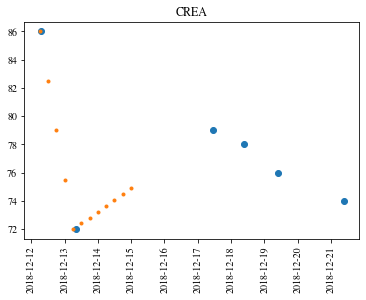

In [10]:
adm_no = 16944
field = 'CREA'
adm_new = df_haematology_new[df_haematology_new['admission_id'] == adm_no]
adm_old = df_haematology_old[df_haematology_old['admission_id'] == adm_no]

plt.plot(adm_old['sample_collection_date_time'],adm_old[field], 'o')
plt.plot(adm_new['sample_collection_date_time'],adm_new[field], '.')
plt.title(field)
plt.xticks(rotation = 90)
plt.show()

In [11]:
df_haematology_new[df_haematology_new['admission_id'] == adm_no]

,admission_id,sample_collection_date_time,CREA,UREA,K,EGFR,GFR,WBC,PLT,HCT,...,MCH,MCV,NEUAB,TLYMAB,EOSAB,MONAB,BASAB,ALB,ALP,BILI
0,16944,2018-12-12 06:00:00,86.000,3.000,4.300,58.000,60.000,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
1,16944,2018-12-12 12:00:00,82.500,3.300,4.200,61.500,63.500,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
2,16944,2018-12-12 18:00:00,79.000,3.600,4.100,65.000,67.000,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
3,16944,2018-12-13 00:00:00,75.500,3.900,4.000,68.500,70.500,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
4,16944,2018-12-13 06:00:00,72.000,4.200,3.900,72.000,74.000,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
5,16944,2018-12-13 12:00:00,72.412,4.224,3.876,71.588,73.529,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
6,16944,2018-12-13 18:00:00,72.824,4.247,3.853,71.176,73.059,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
7,16944,2018-12-14 00:00:00,73.235,4.271,3.829,70.765,72.588,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
8,16944,2018-12-14 06:00:00,73.647,4.294,3.806,70.353,72.118,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
9,16944,2018-12-14 12:00:00,74.059,4.318,3.782,69.941,71.647,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000


In [12]:
df_haematology_old[df_haematology_old['admission_id'] == adm_no]

,admission_id,sample_collection_date_time,CREA,UREA,K,EGFR,GFR,WBC,PLT,HCT,...,MCH,MCV,NEUAB,TLYMAB,EOSAB,MONAB,BASAB,ALB,ALP,BILI
59427,16944,2018-12-12 07:03:00,86.000,3.000,4.300,58.000,60.000,17.400,352.000,0.385,...,25.900,82.000,15.300,1.280,0.060,0.670,0.040,48.000,60.000,8.000
59428,16944,2018-12-13 08:37:00,72.000,4.200,3.900,72.000,74.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59429,16944,2018-12-17 11:03:00,79.000,4.600,3.500,65.000,66.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59430,16944,2018-12-18 09:36:00,78.000,4.600,3.500,66.000,67.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59431,16944,2018-12-19 10:02:00,76.000,4.600,3.500,68.000,69.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59432,16944,2018-12-21 09:19:00,74.000,4.300,3.500,70.000,71.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


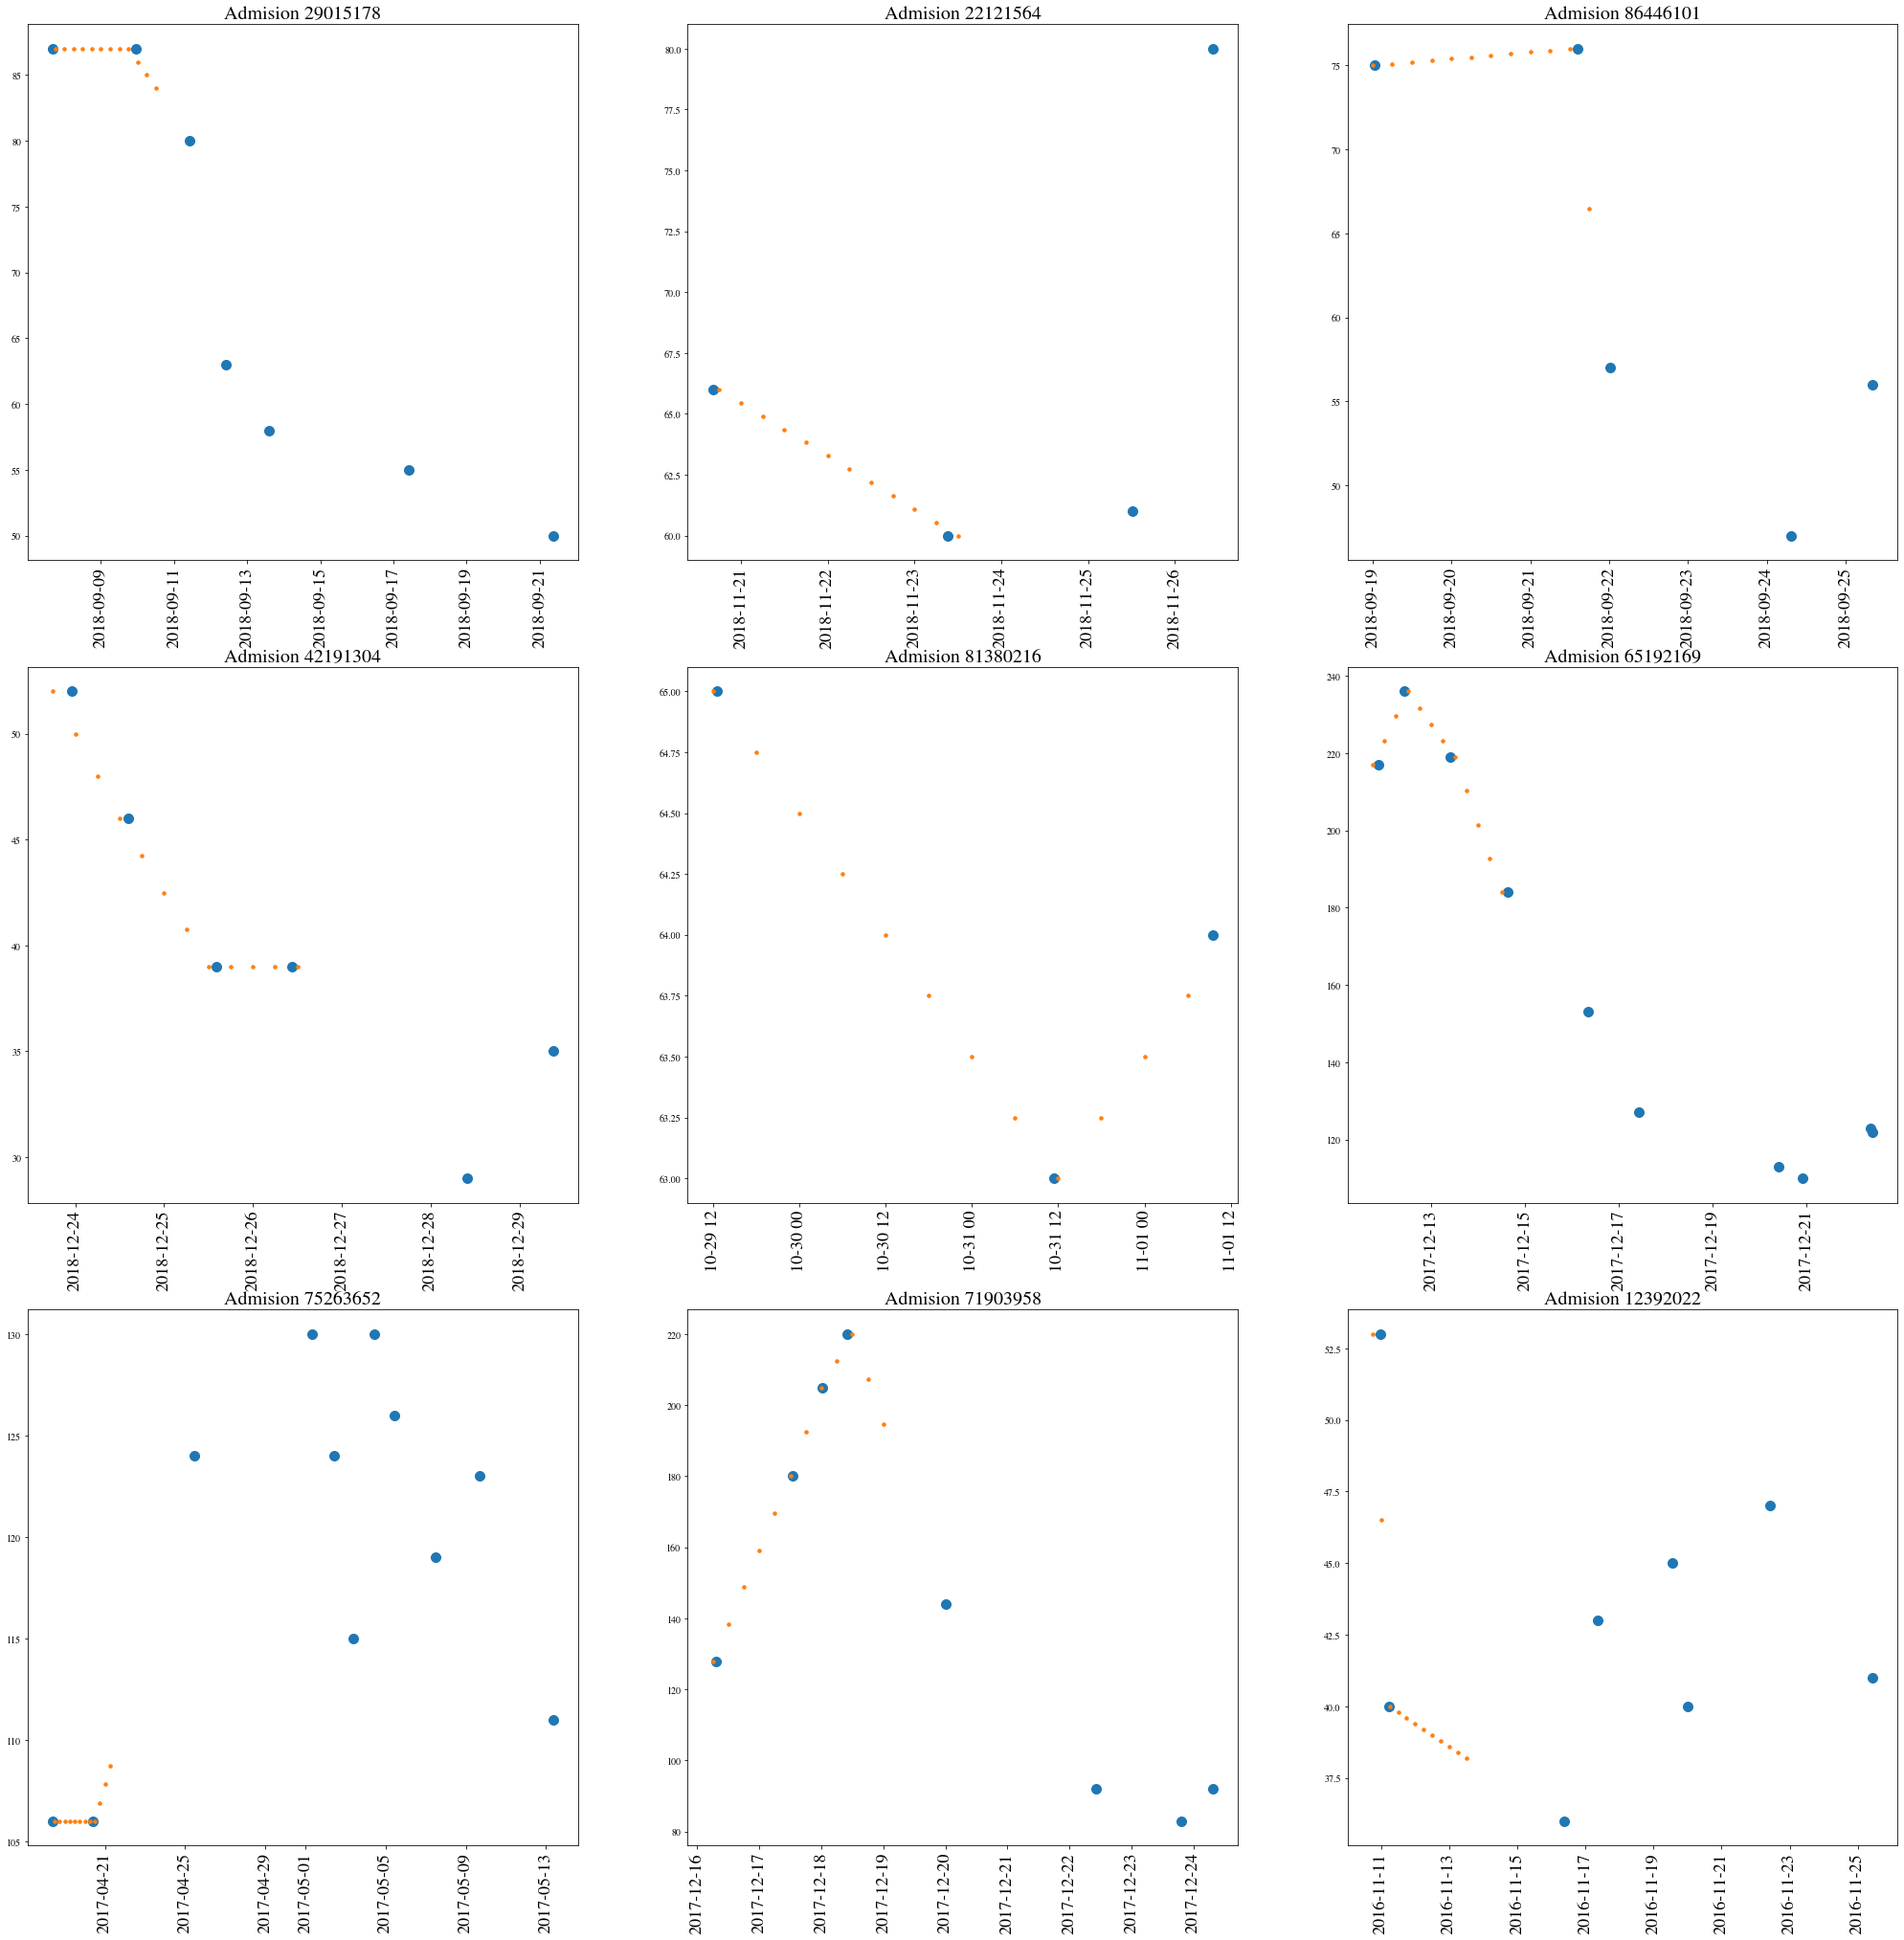

In [13]:
fig = plt.figure(figsize = (35,35))
n_plots = 9
admns = df_haematology_new['admission_id'].unique().tolist()
idx_adm = random.sample(range(len(admns)), n_plots)


for i, idx in enumerate(idx_adm):
    adm_no = admns[idx]
    
    adm_new = df_haematology_new[df_haematology_new['admission_id'] == adm_no]
    adm_old = df_haematology_old[df_haematology_old['admission_id'] == adm_no]
    
    ax = fig.add_subplot(3, 3, i+1)
    
    plt.plot(adm_old['sample_collection_date_time'],adm_old[field], 'o', markersize =10, label = 'Original')
    plt.plot(adm_new['sample_collection_date_time'],adm_new[field], '.', markersize =7, label = 'Interpolation')
    ax.set_title('Admision ' + str(adm_no), fontsize = 20)
    ax.tick_params(axis = 'x',rotation = 90, labelsize = 18)
    plt.savefig(r'Images/Train_InterpolationHaemTotalResults_'+ str(adm_no) +'.png', transparent = True, bbox_inches = "tight")
plt.show()

In [14]:

dct_lbl_1 = {'CREA':'Creatinine','UREA':'Urea','K':'Potassium', 'GFR':'GFR', 'WBC':'WBC', 'PLT':'Platelets'}#,'HCT':'HCT'}
               
dct_lbl_2 = {'HGB':'Haemoglobin','RBC':'RBC','MCH':'MCH','MCV':'MCV','NEUAB':'Neutrophil Ab','TLYMAB':'T-lymphocite Ab'}
                
dct_lbl_3 = {'EOSAB':'EOS Ab','MONAB':'Monocyte Ab','BASAB':'Anti Basophil Ab','ALB':'Albumin',
               'ALP':'Alk. Phosphate','BILI':'Bilirubin'}

def plot_eobs_admin(adm_no, dictionary_labels, save = False):
    adm_new = df_haematology_new[df_haematology_new['admission_id'] == adm_no]
    adm_old = df_haematology_old[(df_haematology_old['admission_id'] == adm_no) &
                         (df_haematology_old['sample_collection_date_time'] <= adm_new['sample_collection_date_time'].max())]

    
    fig = plt.figure(figsize = (35,8))
    for i,field in enumerate(dictionary_labels.keys()):
        ax = fig.add_subplot(1,6 , i+1)

        ax.plot(adm_new['sample_collection_date_time'],adm_new[field], '.-', label = 'Interpolation')
        
        ax.plot(adm_old['sample_collection_date_time'],adm_old[field], 'o', label = 'Original', markersize =10)

        #ax.set_title(field, fontsize = 17)
        fig.text(0.09, 0.5, 'admission ' + str(adm_no), va='center', rotation='vertical', fontsize = 30)
        ax.tick_params(axis = 'x',rotation = 90, labelsize = 20)
        ax.tick_params(axis = 'y', labelsize = 20)
    if list(dictionary_labels.keys())[0] == 'CREA':
        fig.text(0.17, 0.95, list(dictionary_labels.keys())[0], va='center', fontsize = 30)
        fig.text(0.295, 0.95,  list(dictionary_labels.keys())[1], va='center', fontsize = 30)
        fig.text(0.44, 0.95, list(dictionary_labels.keys())[2], va='center', fontsize = 30)
        fig.text(0.565, 0.95, list(dictionary_labels.keys())[3], va='center', fontsize = 30)
        fig.text(0.70, 0.95, list(dictionary_labels.keys())[4], va='center', fontsize = 30)
        fig.text(0.83, 0.95, list(dictionary_labels.keys())[5], va='center', fontsize = 30)
    elif list(dictionary_labels.keys())[0] == 'HGB':
        fig.text(0.17, 0.95, list(dictionary_labels.keys())[0], va='center', fontsize = 30)
        fig.text(0.295, 0.95,  list(dictionary_labels.keys())[1], va='center', fontsize = 30)
        fig.text(0.44, 0.95, list(dictionary_labels.keys())[2], va='center', fontsize = 30)
        fig.text(0.565, 0.95, list(dictionary_labels.keys())[3], va='center', fontsize = 30)
        fig.text(0.70, 0.95, list(dictionary_labels.keys())[4], va='center', fontsize = 30)
        fig.text(0.83, 0.95, list(dictionary_labels.keys())[5], va='center', fontsize = 30)
    elif list(dictionary_labels.keys())[0] == 'EOSAB':
        fig.text(0.17, 0.95, list(dictionary_labels.keys())[0], va='center', fontsize = 30)
        fig.text(0.295, 0.95,  list(dictionary_labels.keys())[1], va='center', fontsize = 30)
        fig.text(0.44, 0.95, list(dictionary_labels.keys())[2], va='center', fontsize = 30)
        fig.text(0.565, 0.95, list(dictionary_labels.keys())[3], va='center', fontsize = 30)
        fig.text(0.70, 0.95, list(dictionary_labels.keys())[4], va='center', fontsize = 30)
        fig.text(0.83, 0.95, list(dictionary_labels.keys())[5], va='center', fontsize = 30)
        
    if save == True:
        plt.savefig(r'Images/Train_InterpolationEObsExample_'+ str(adm_no) +'.png', transparent = True, bbox_inches = "tight")
    plt.show()

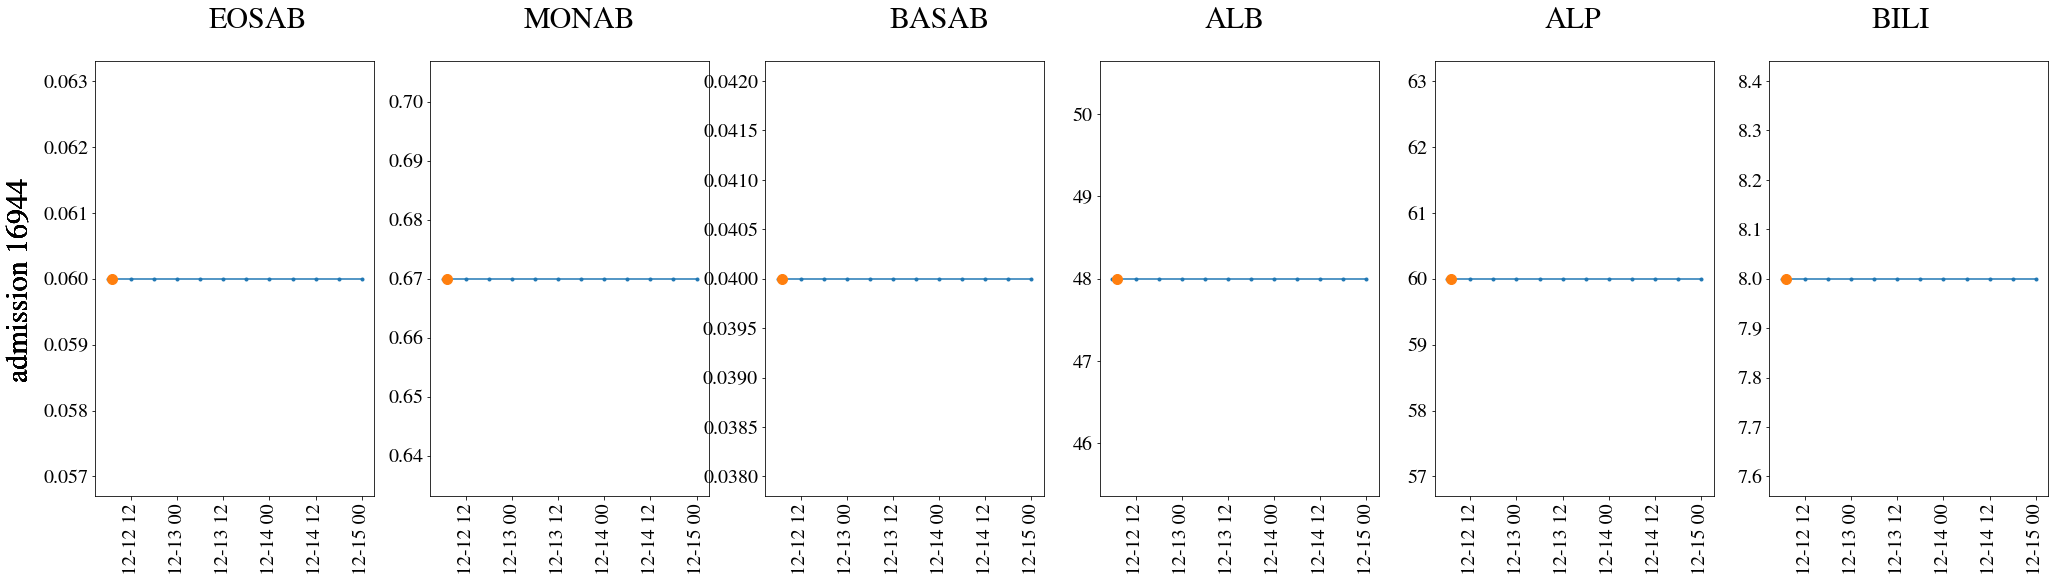

In [15]:
adm_no = 16944
plot_eobs_admin(adm_no, dct_lbl_3, save = False)

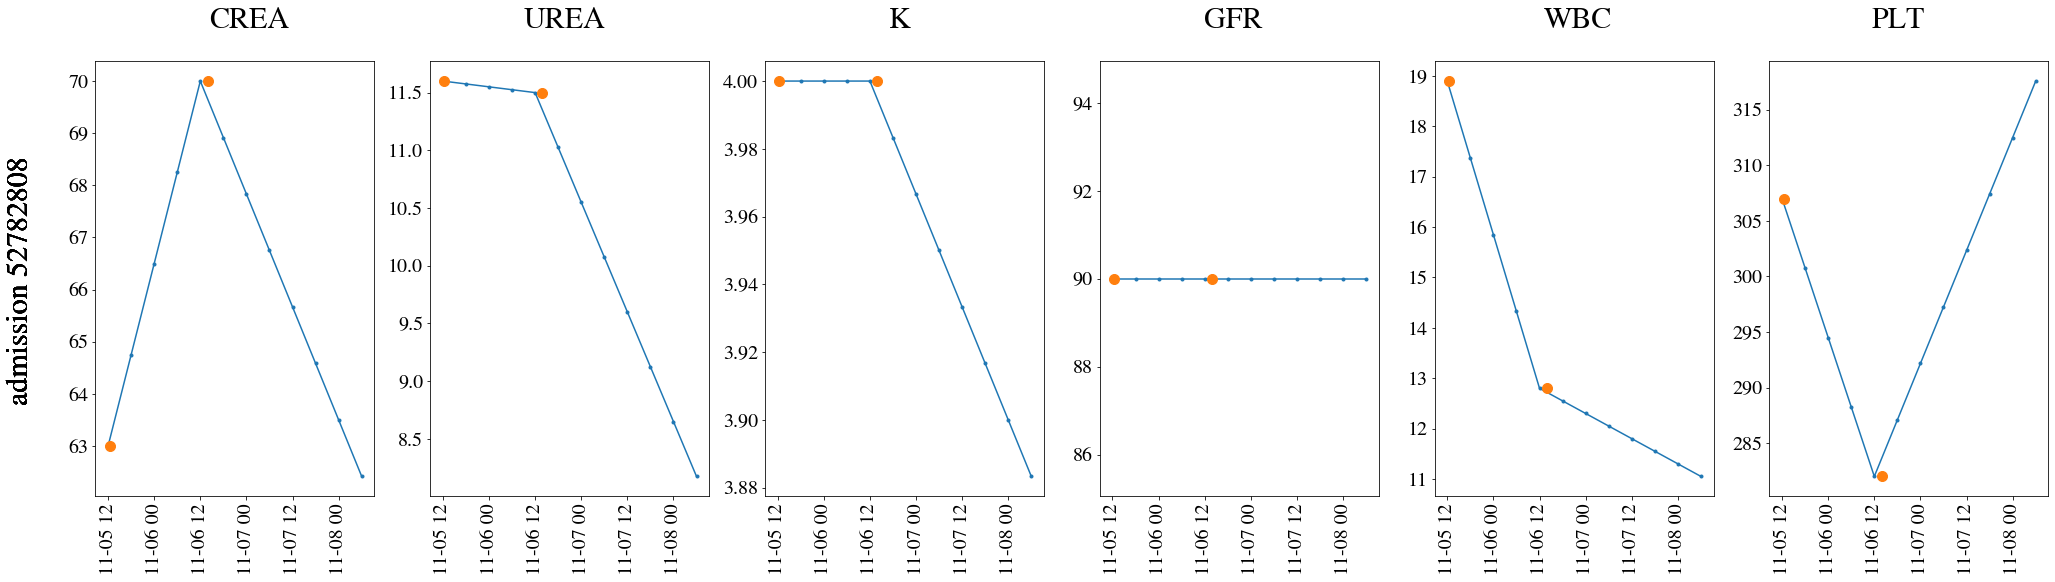

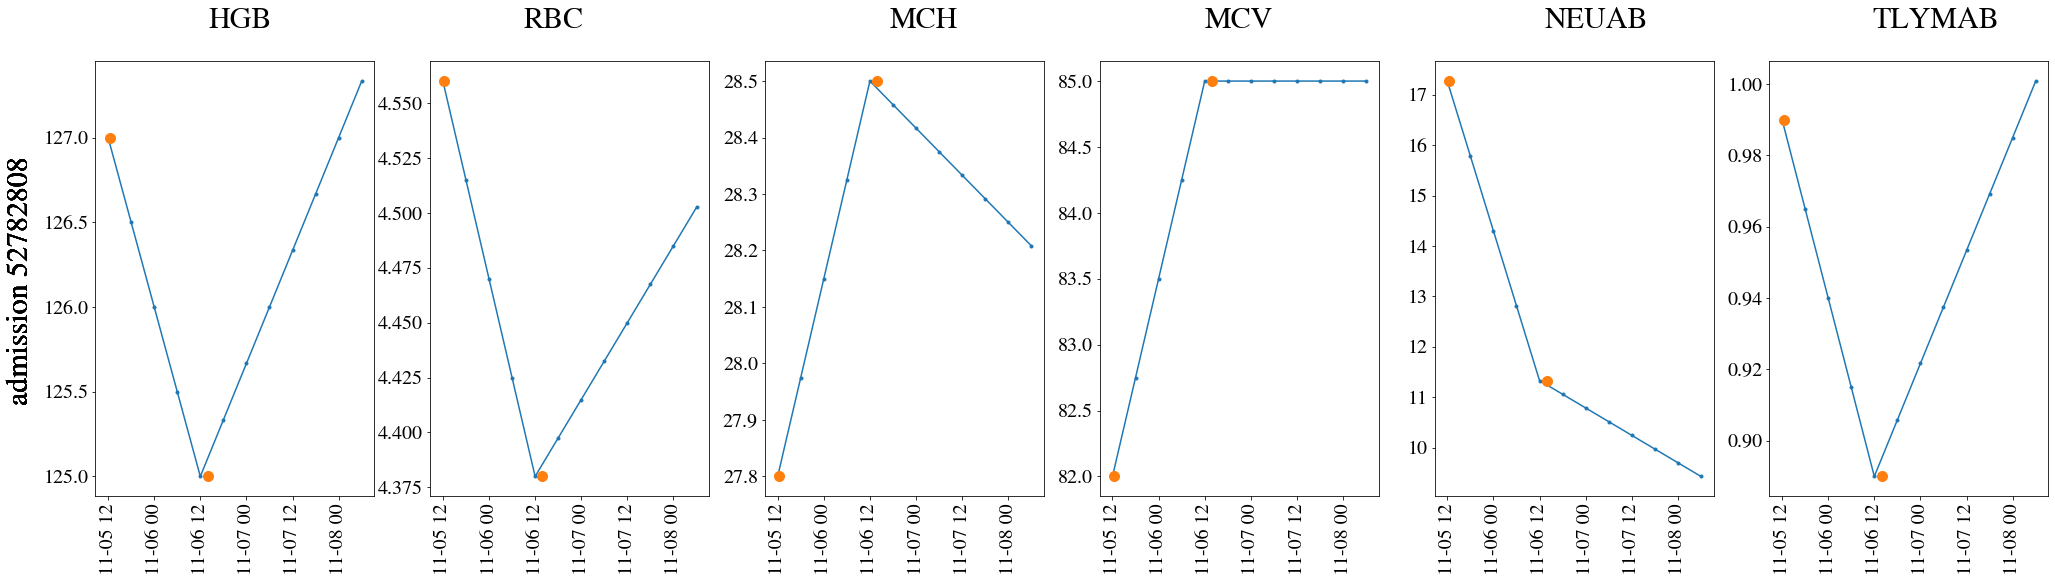

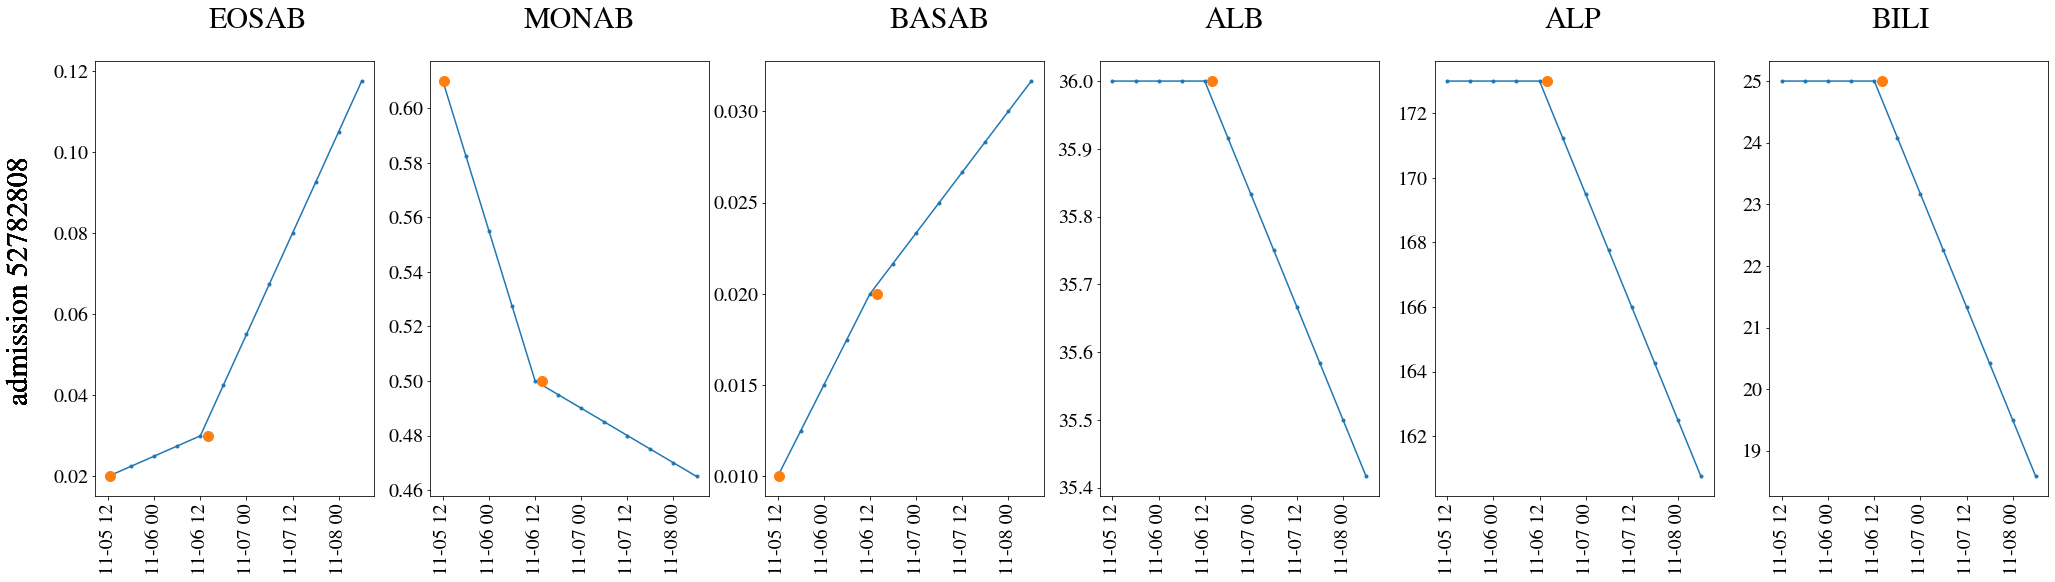

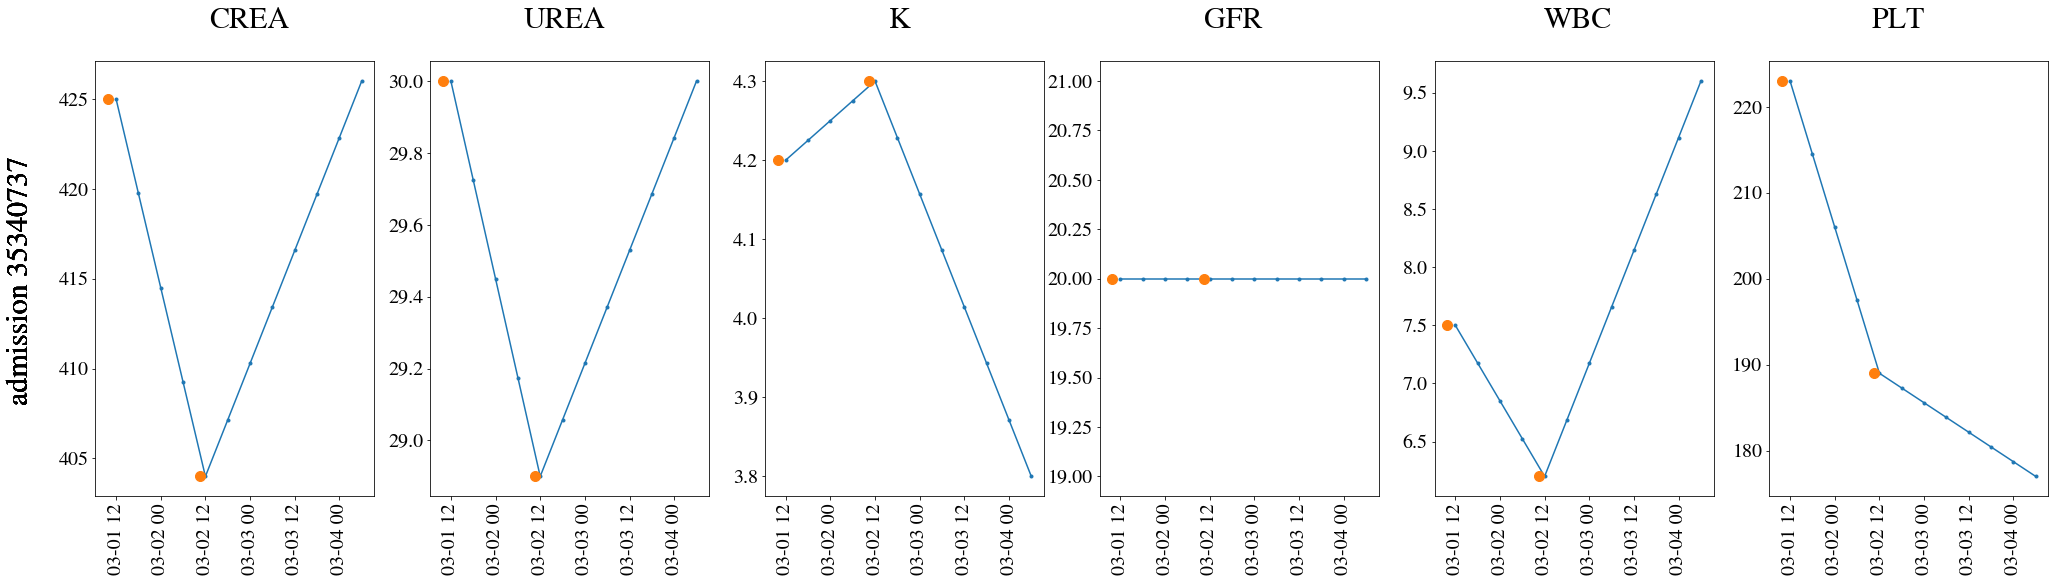

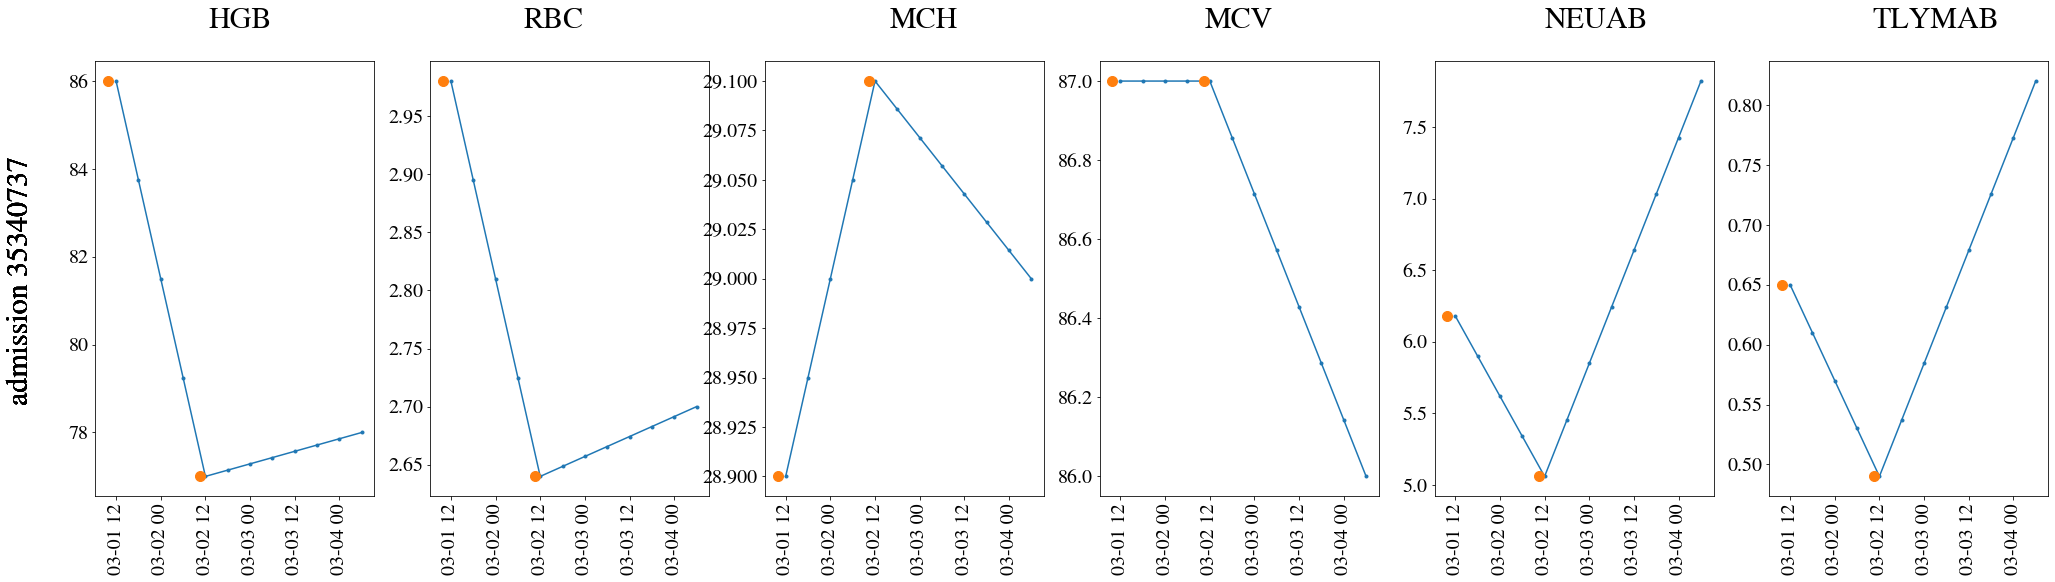

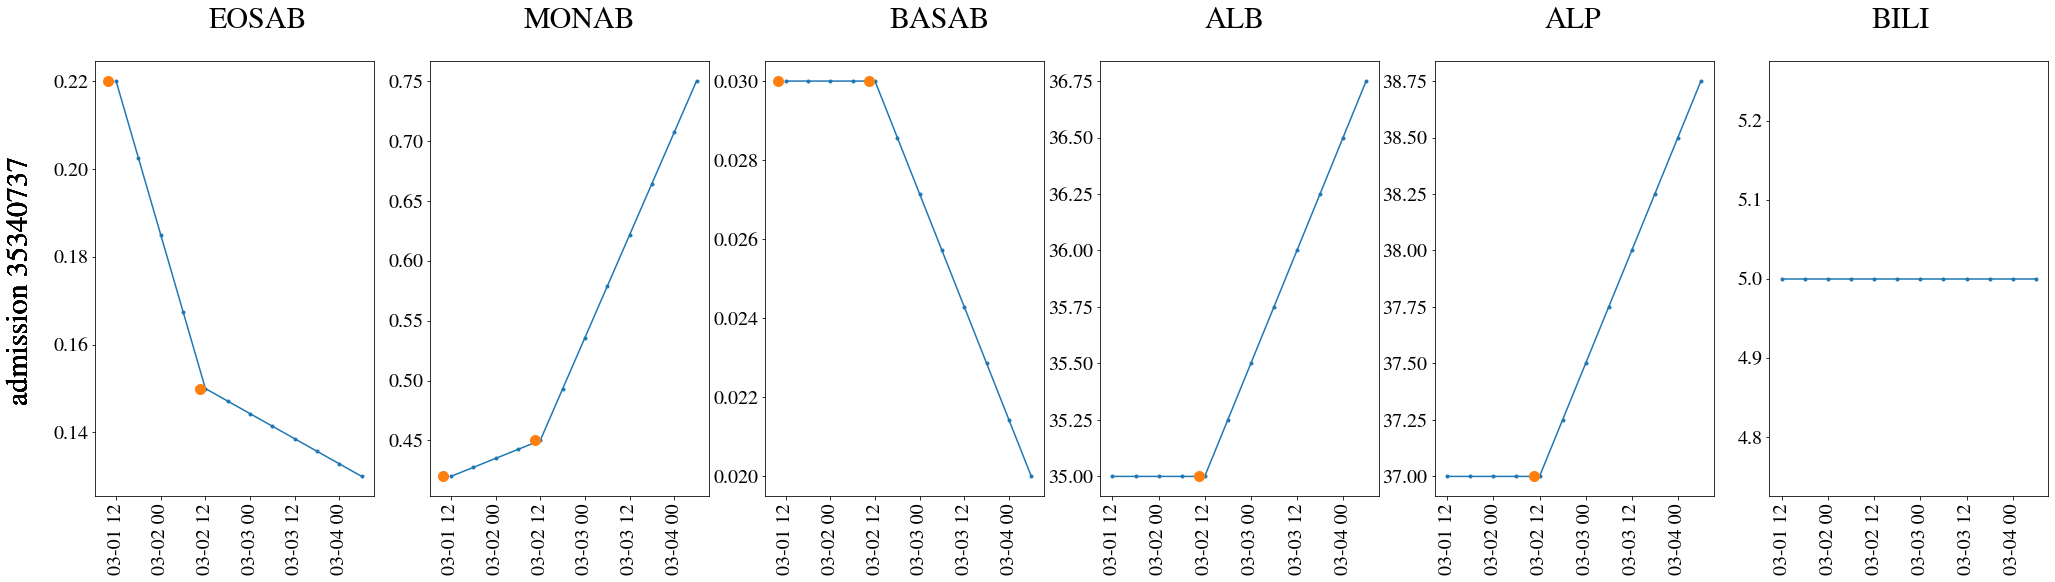

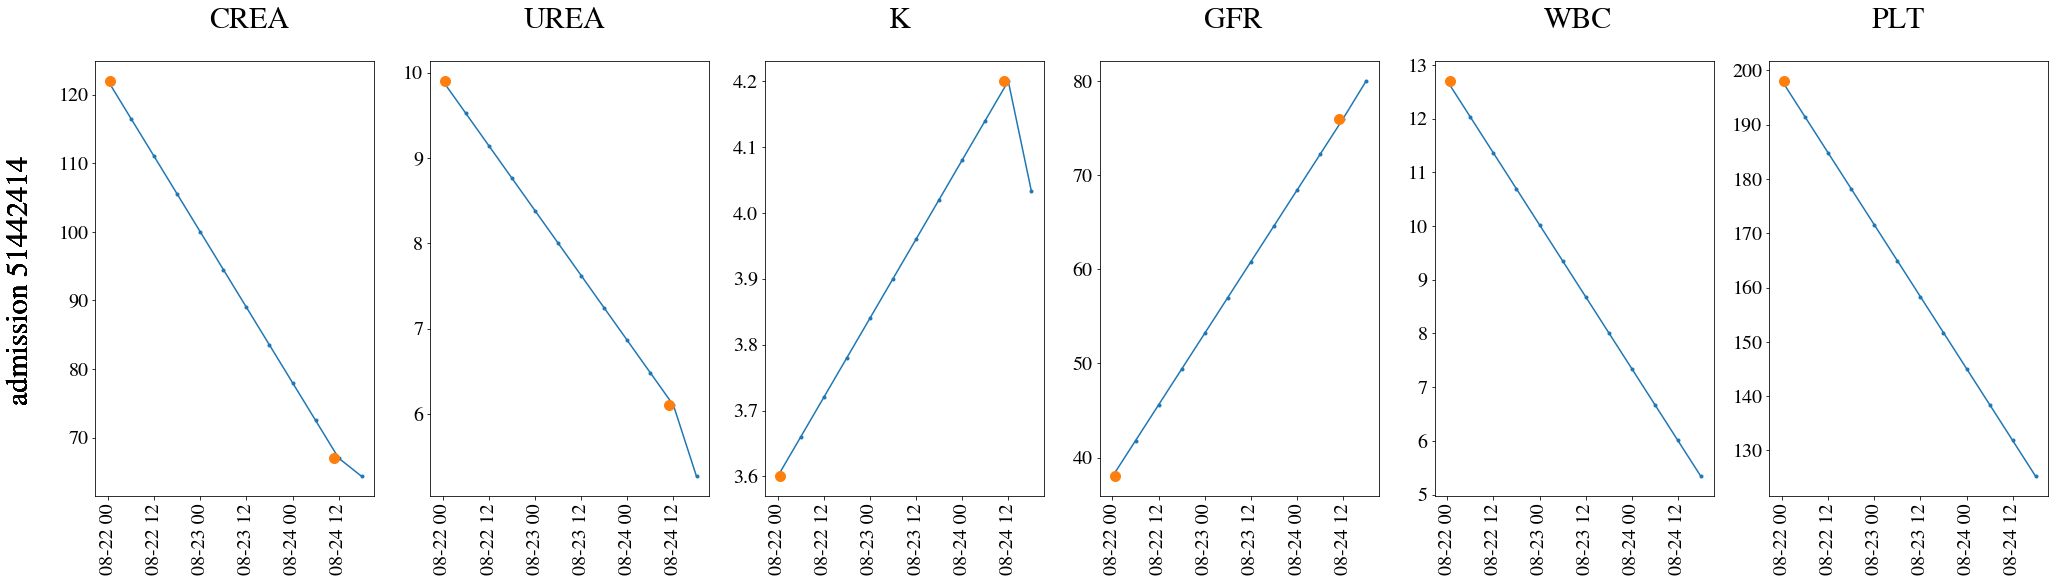

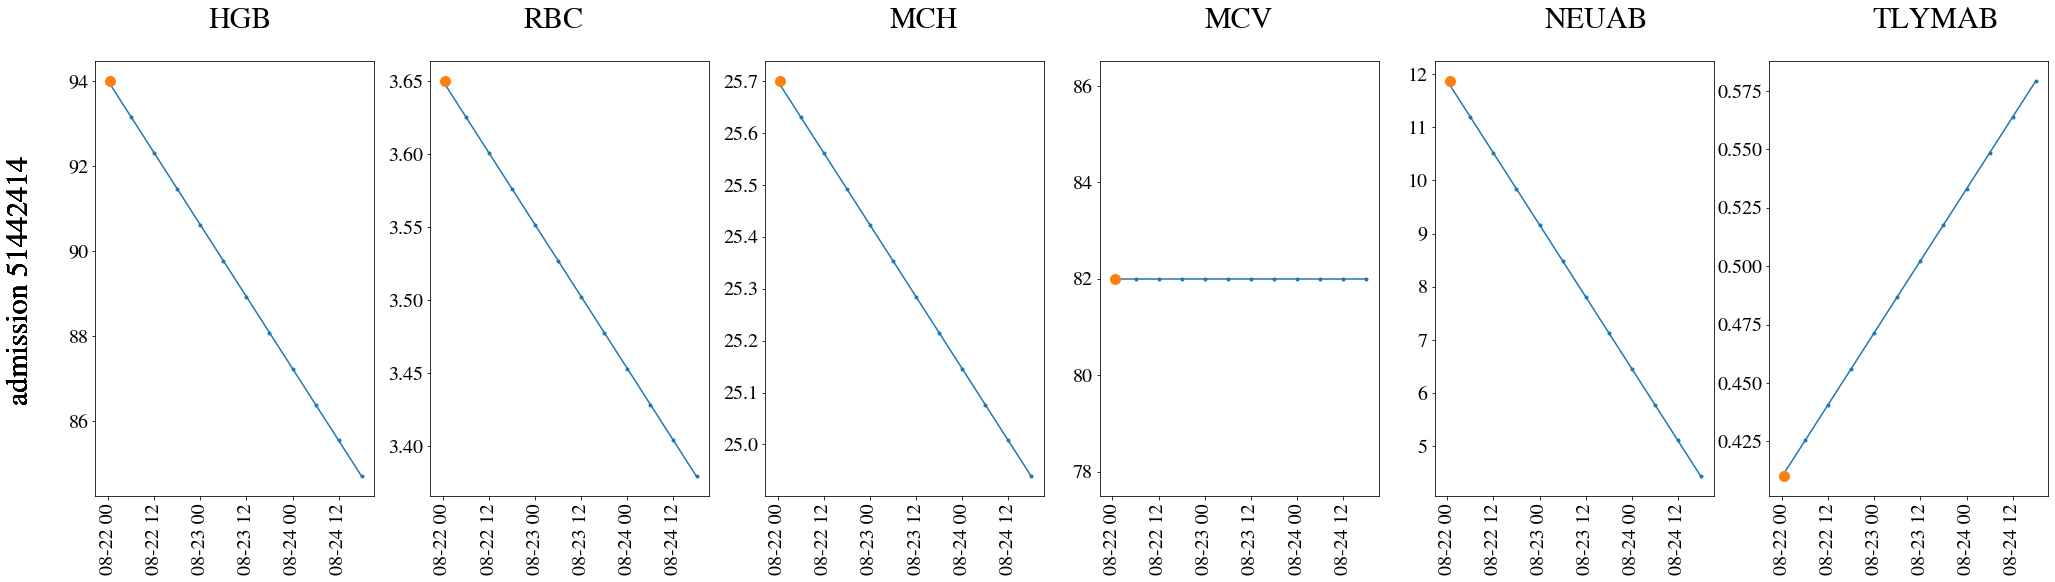

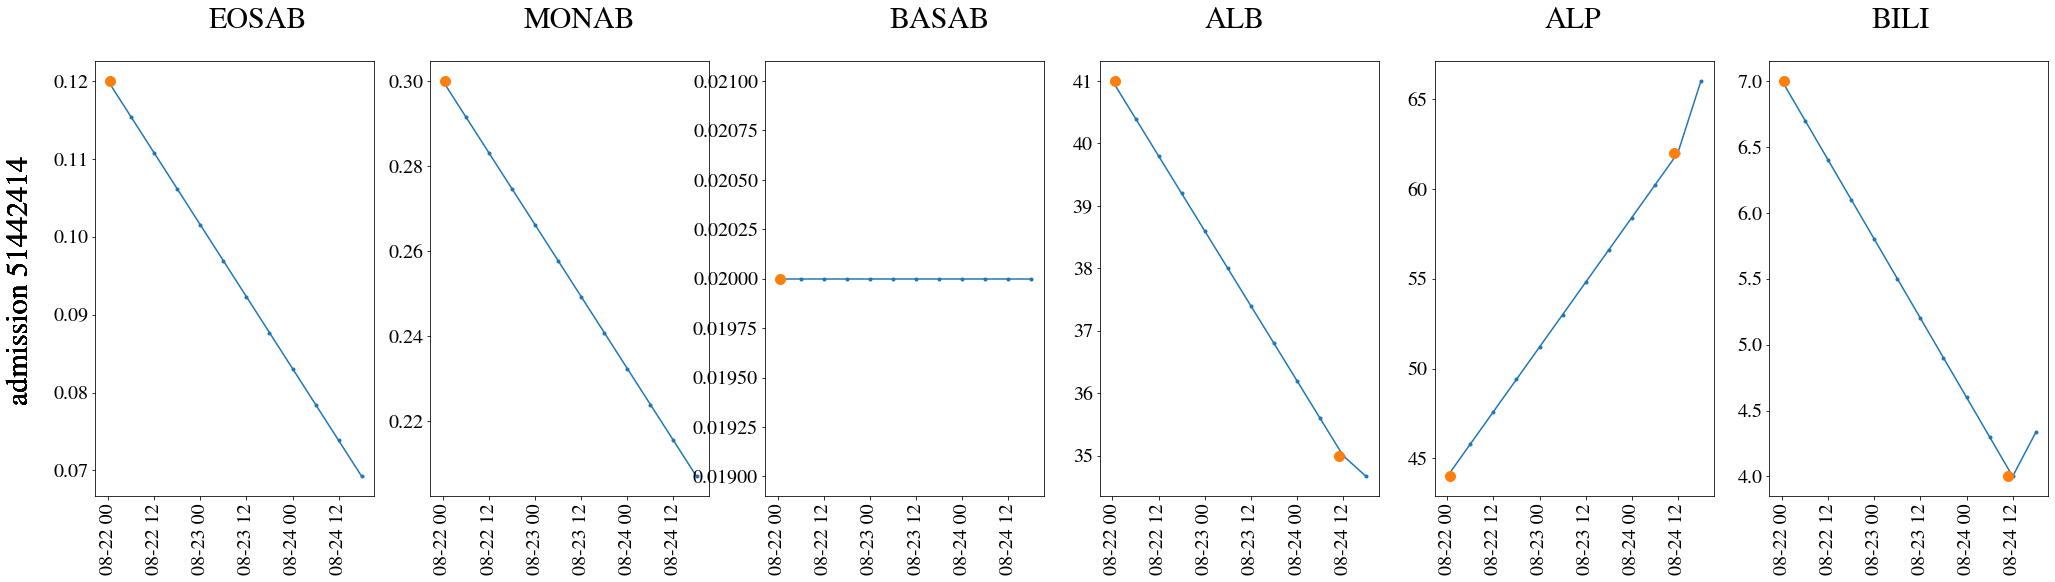

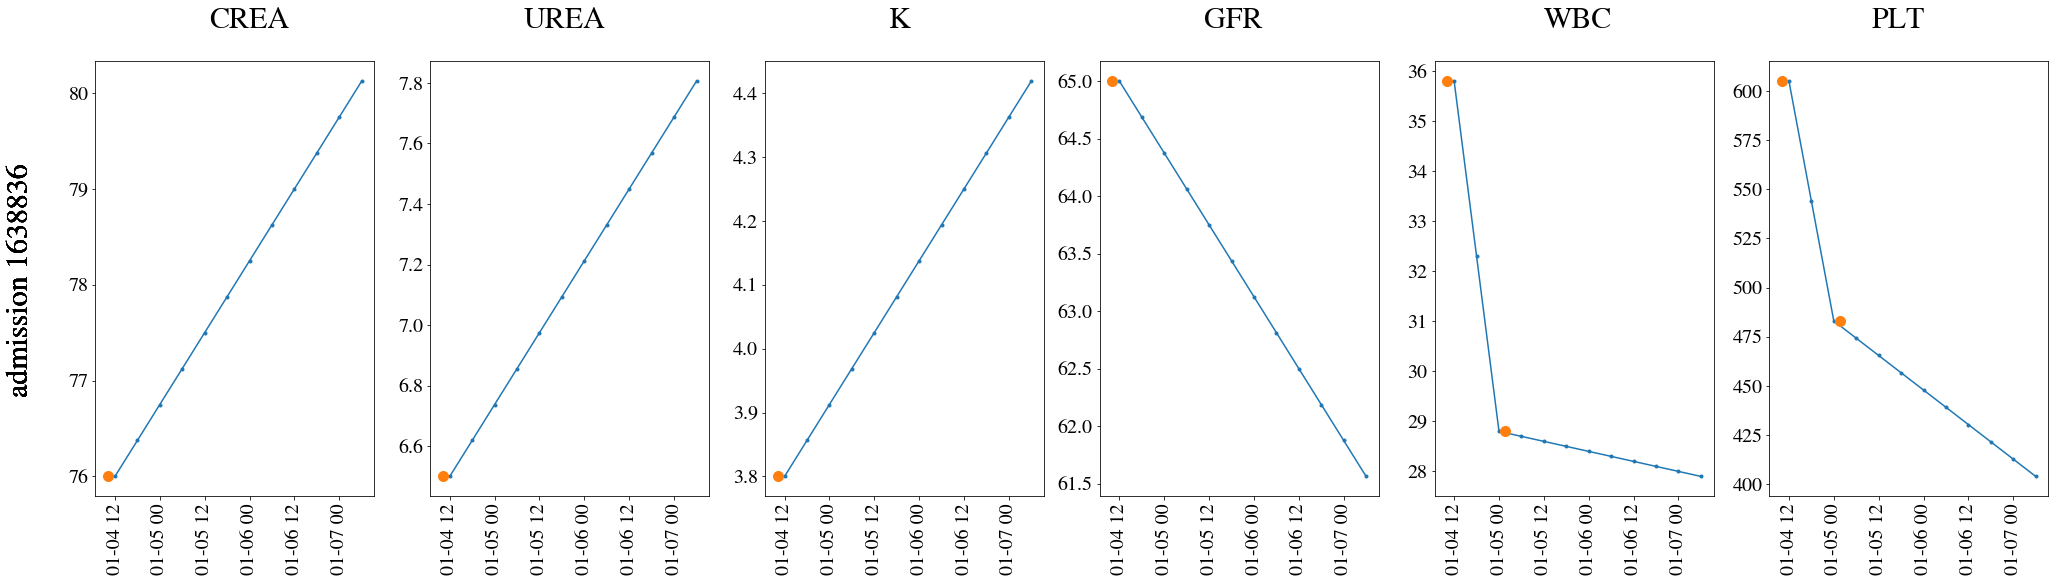

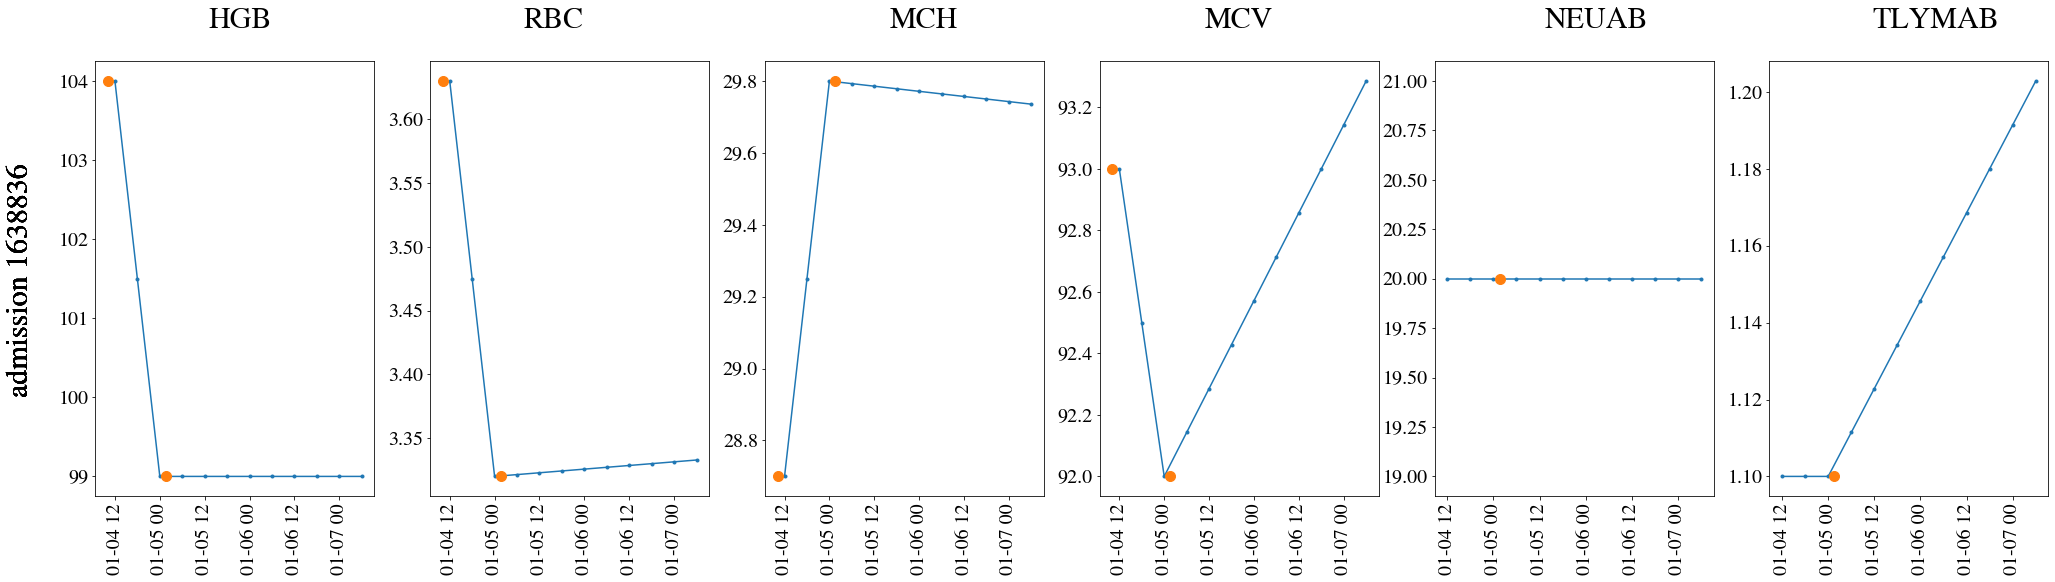

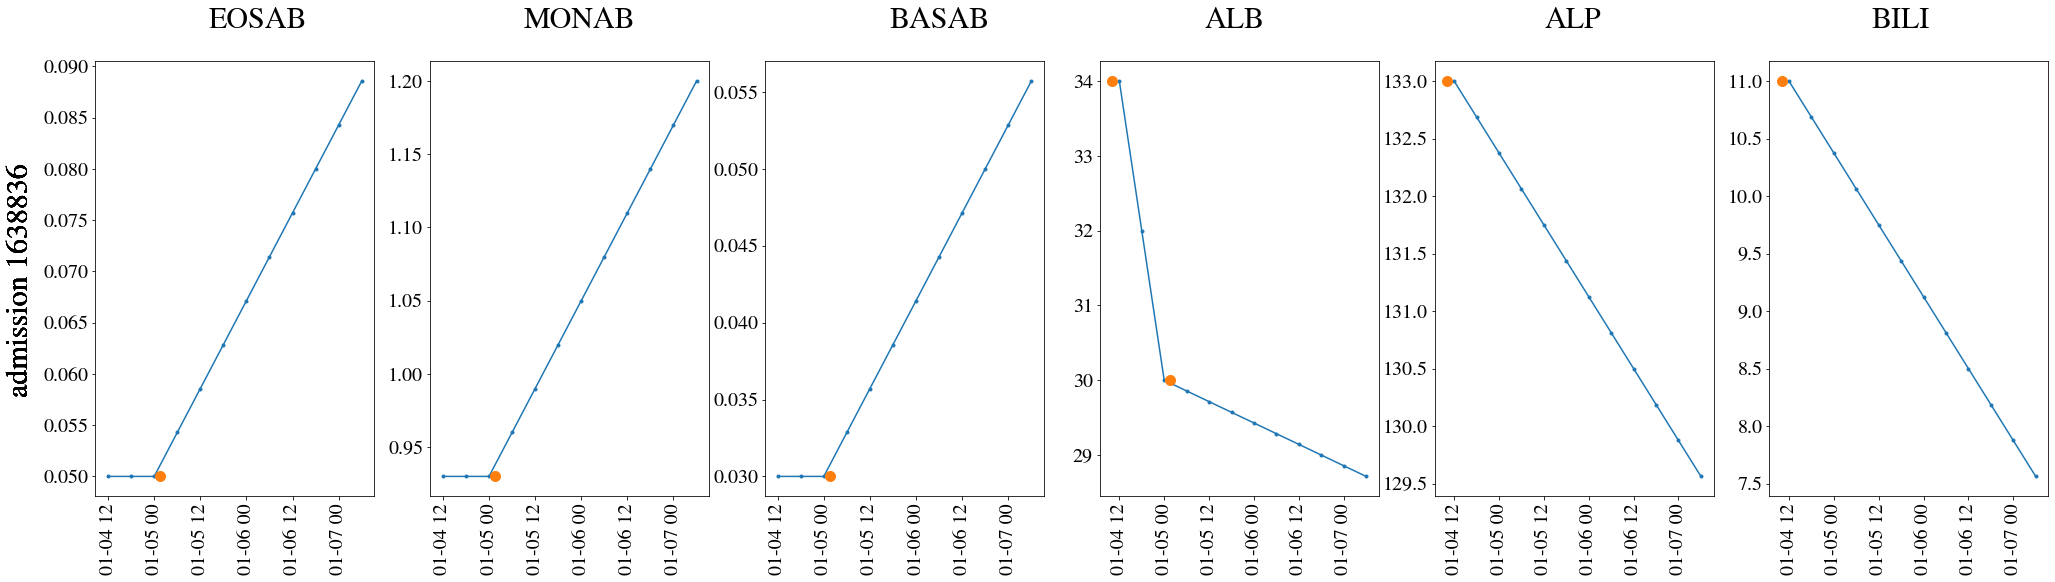

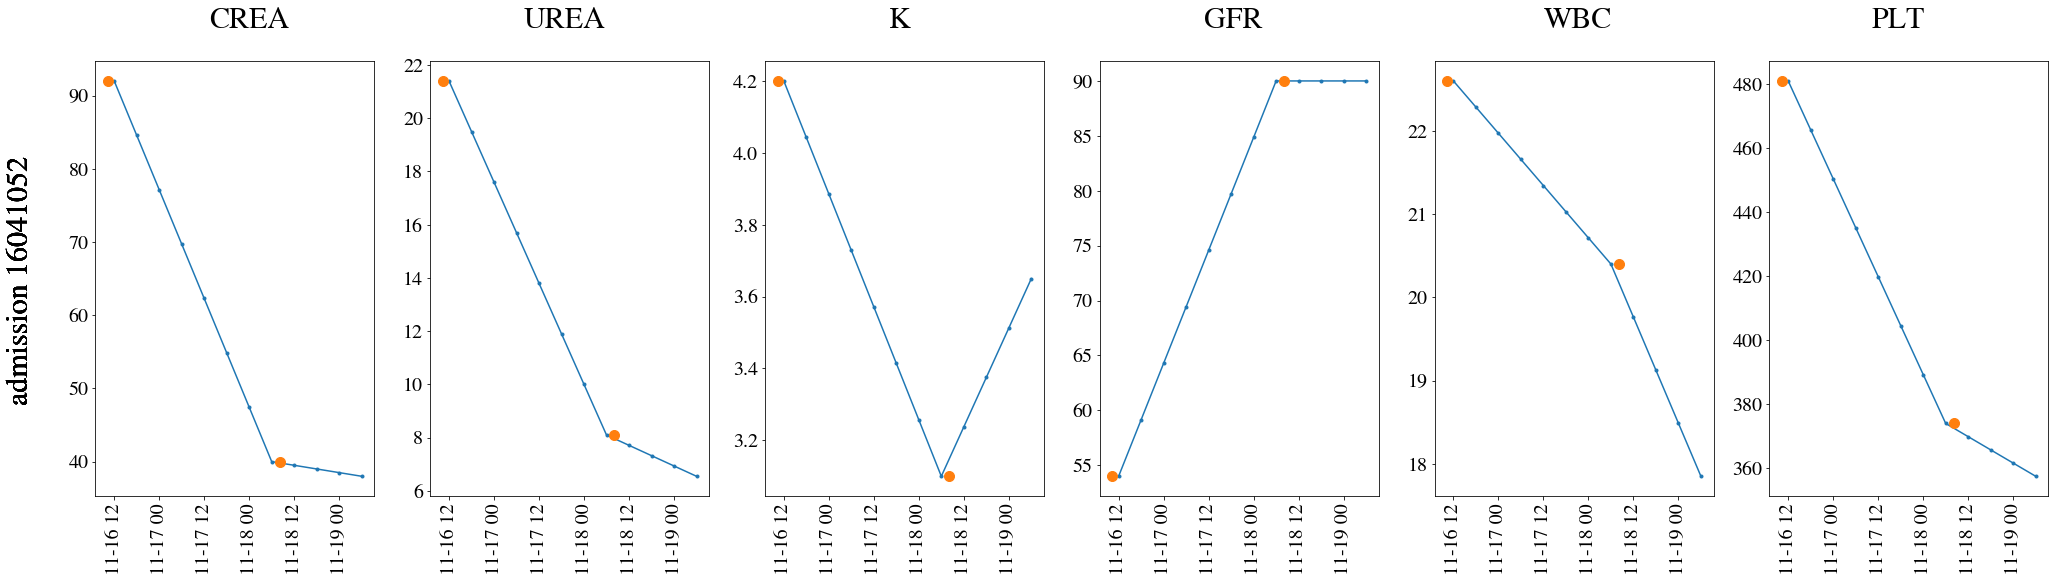

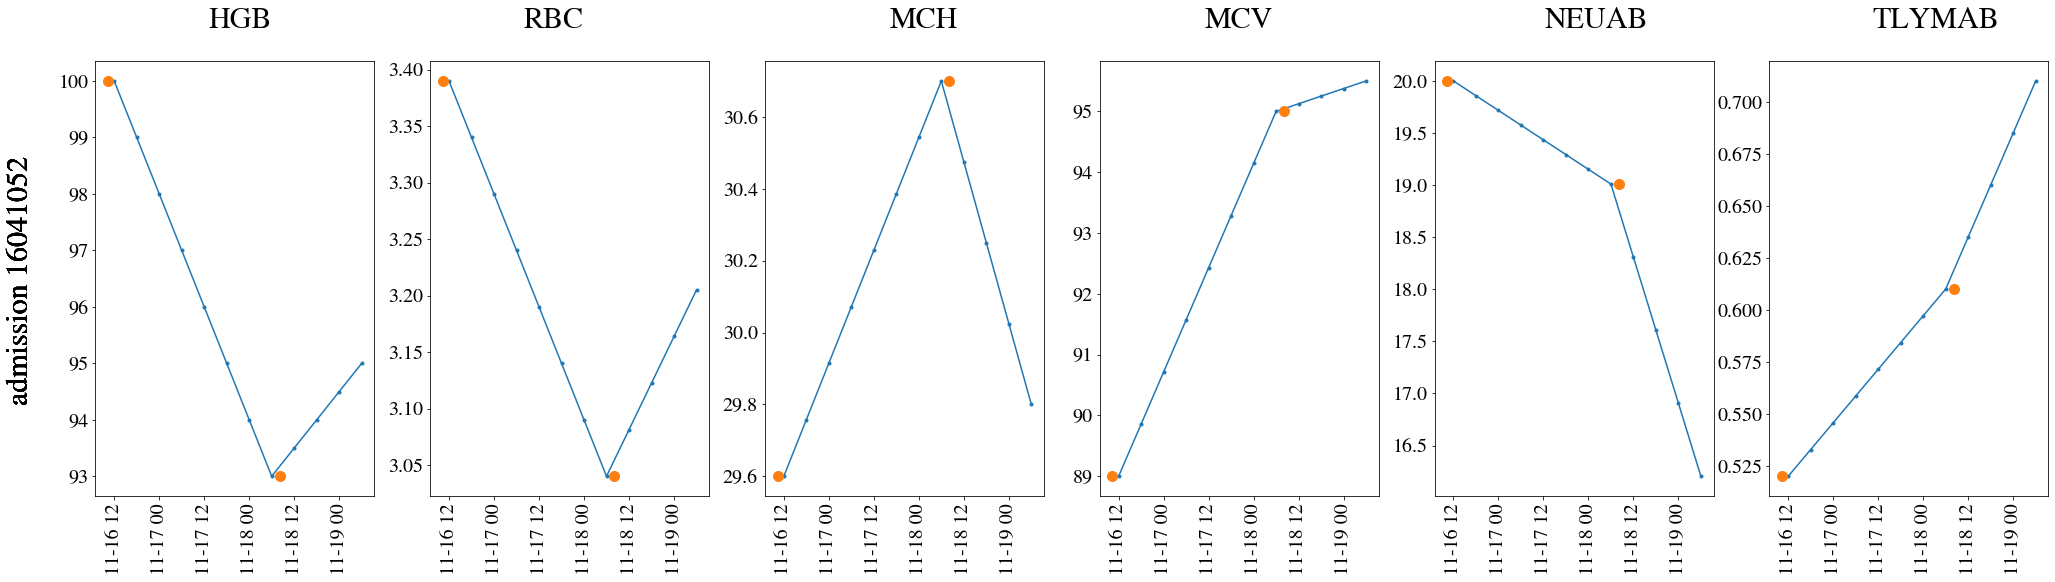

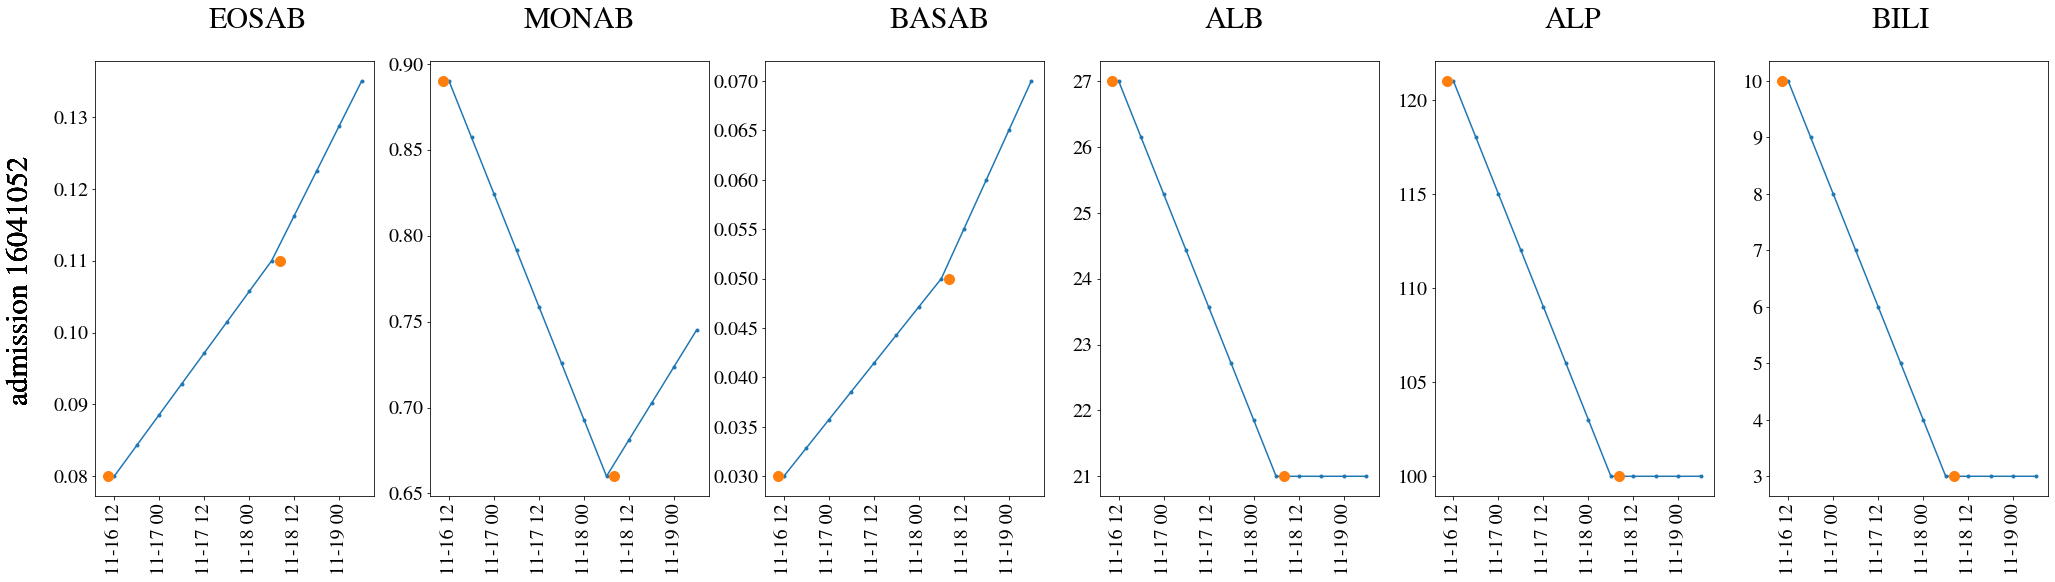

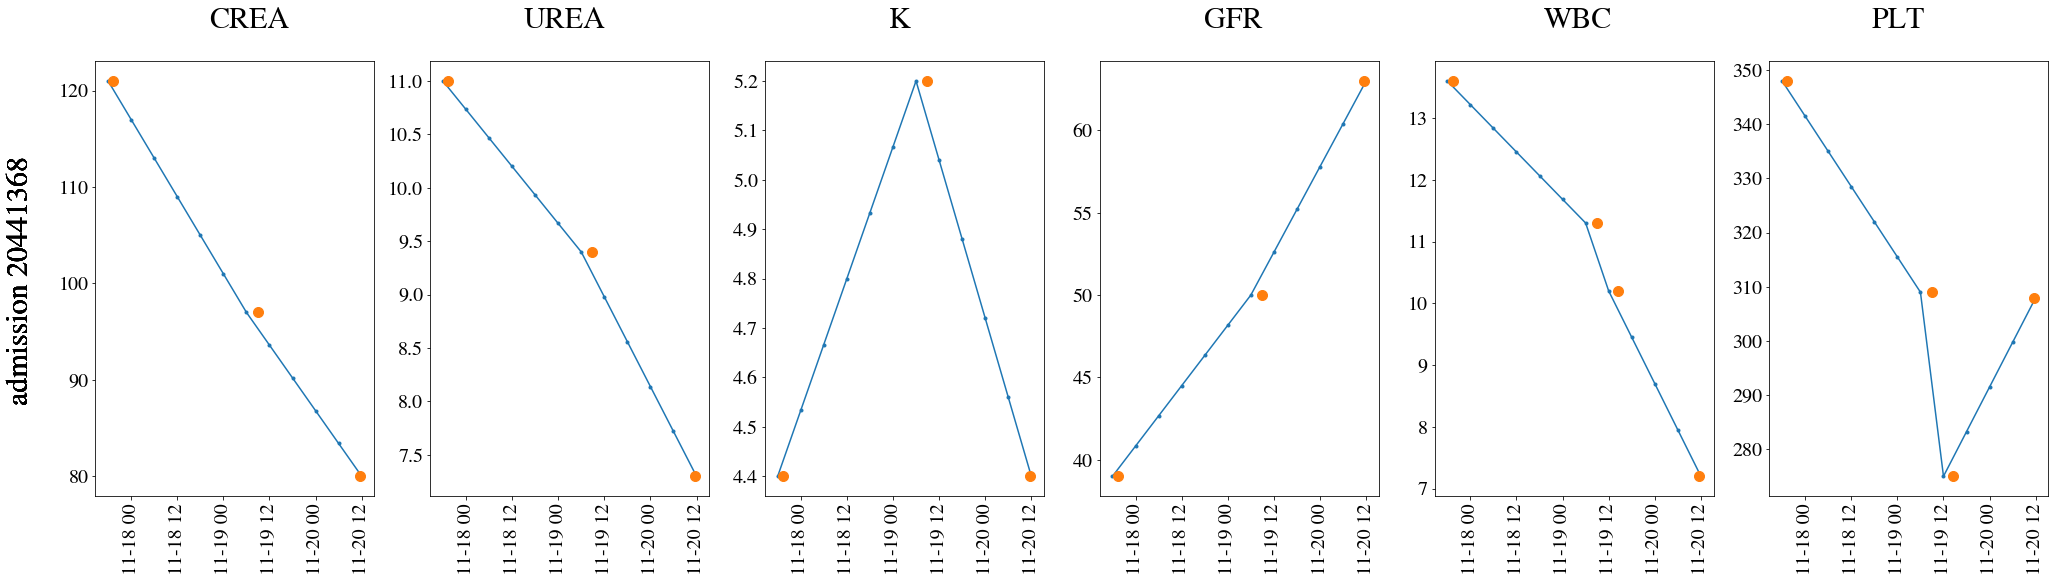

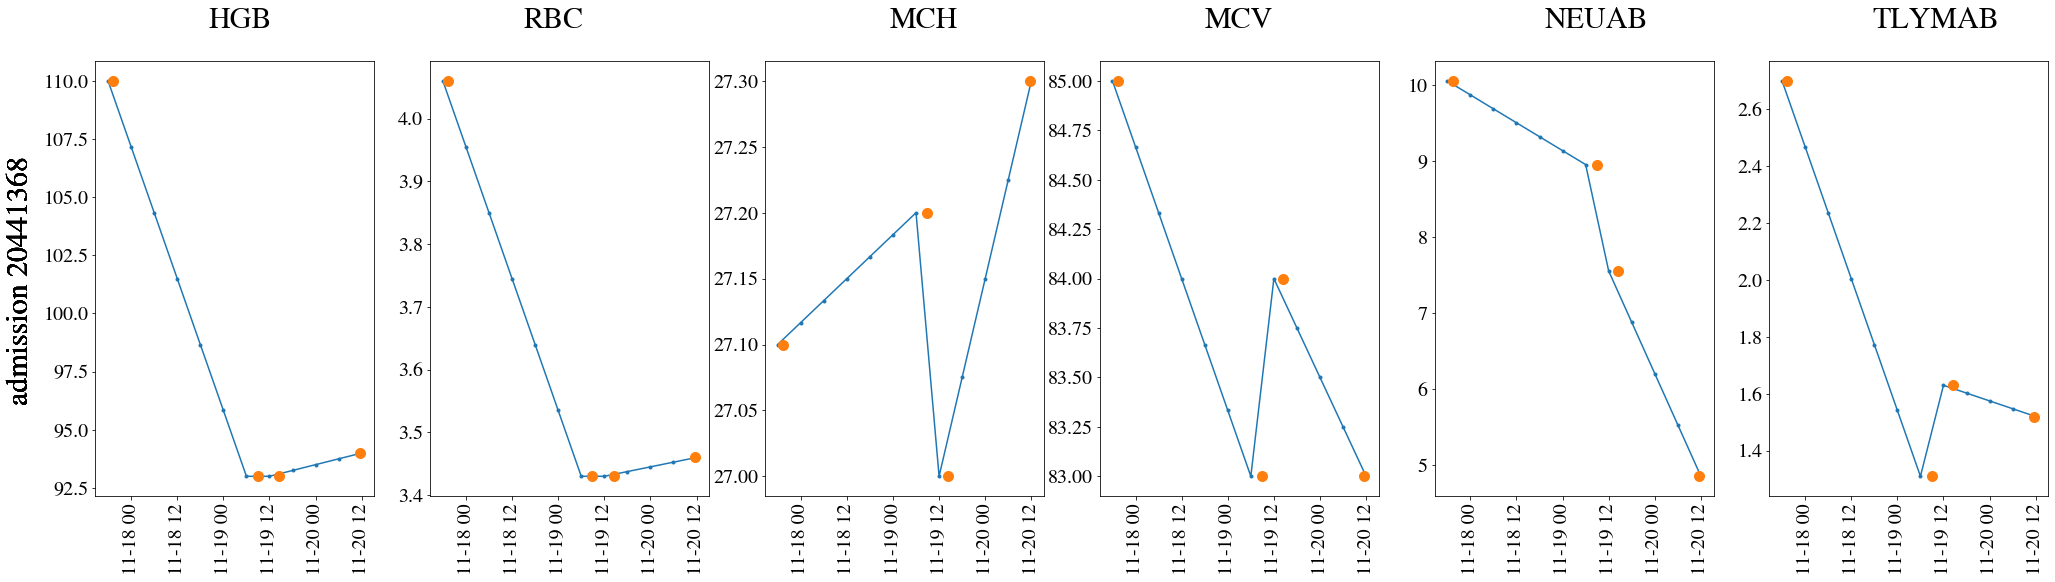

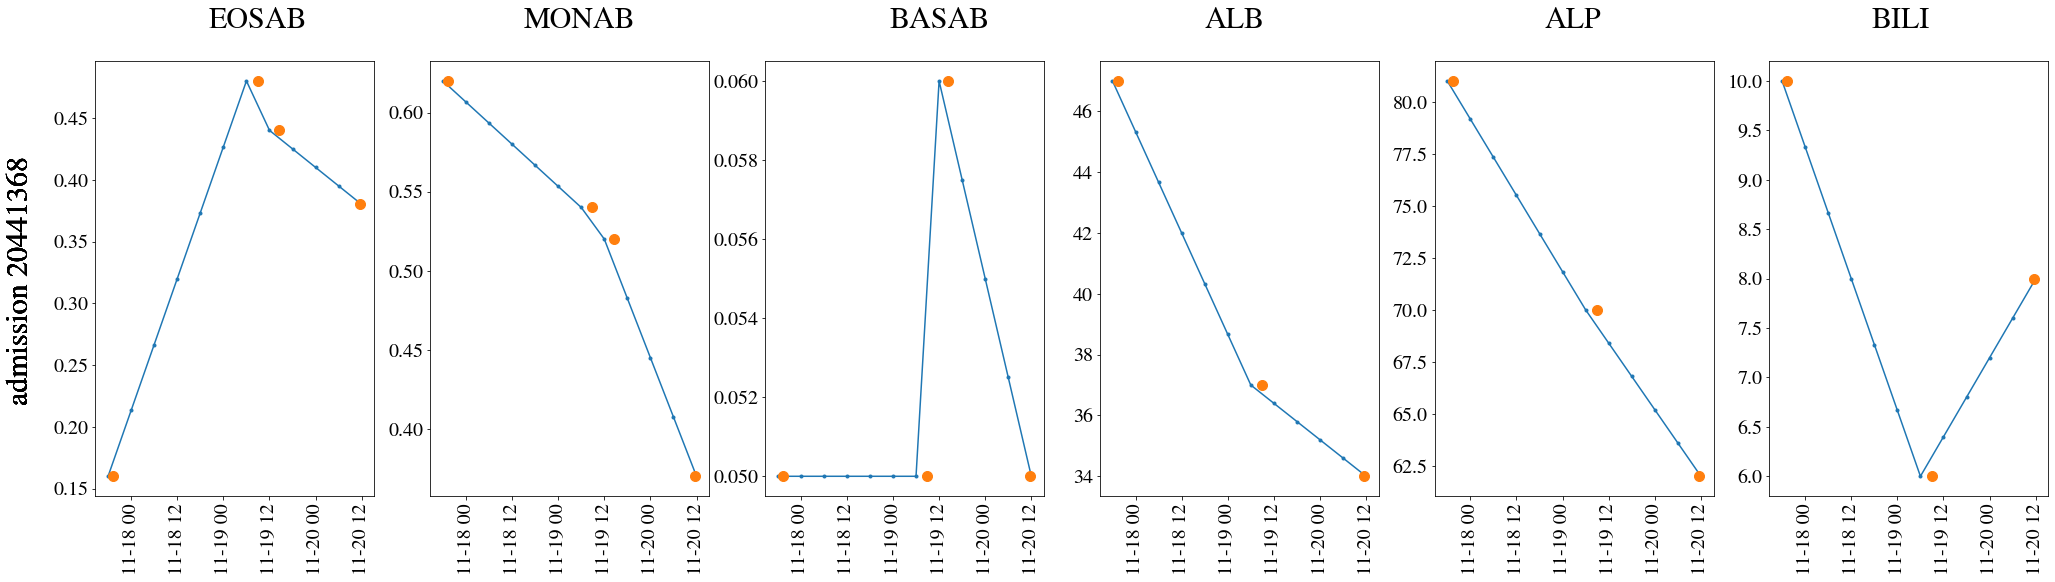

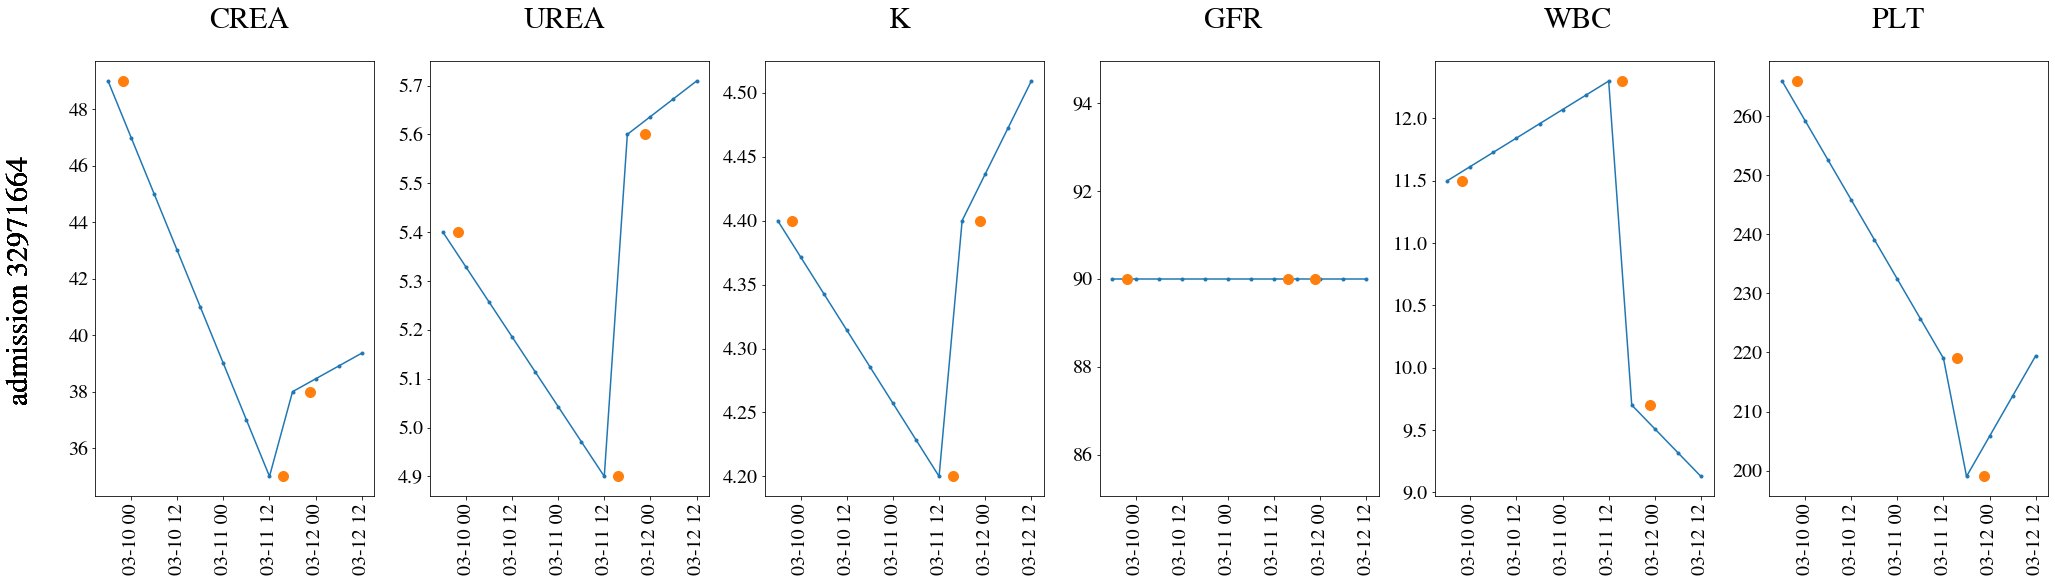

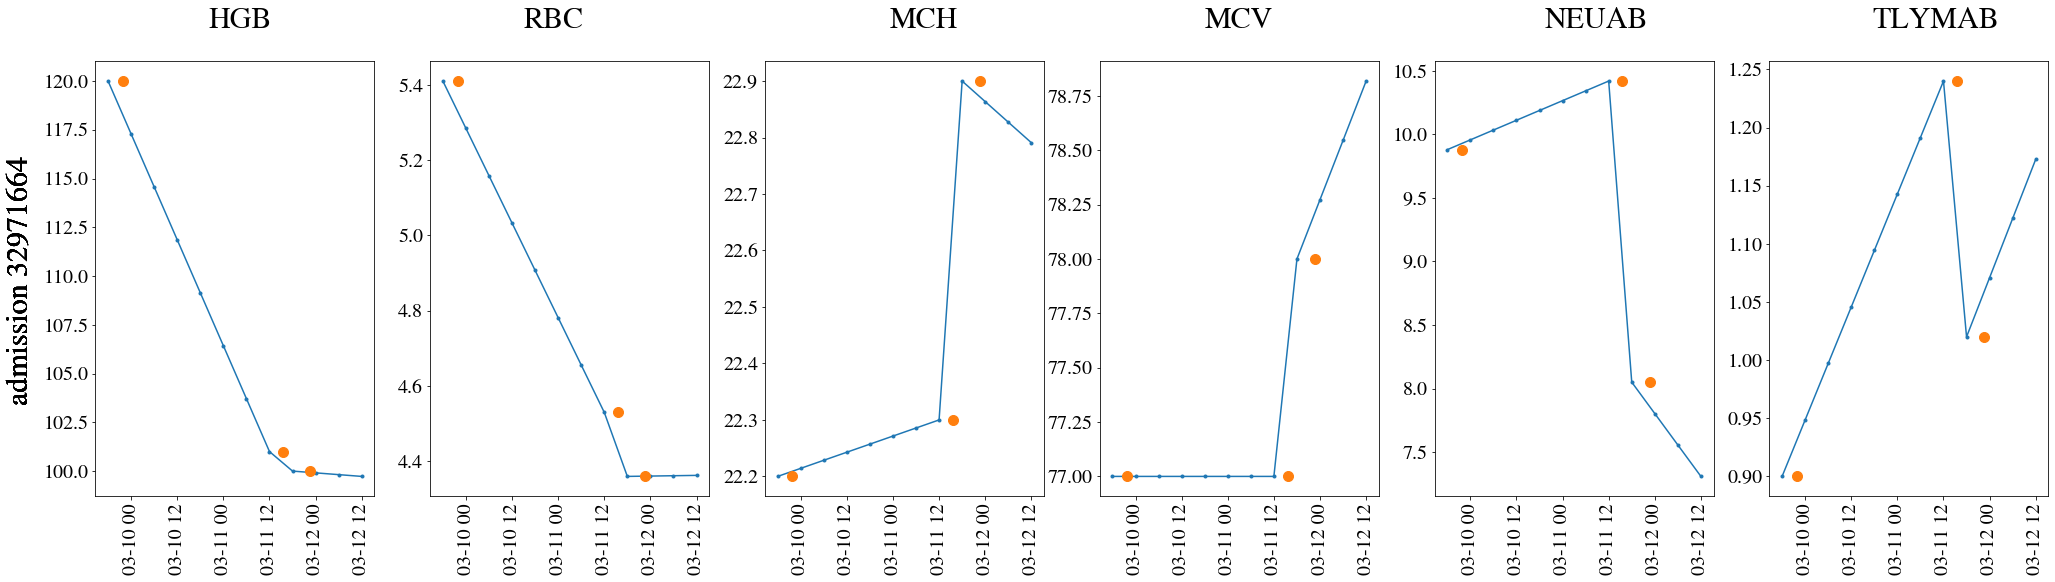

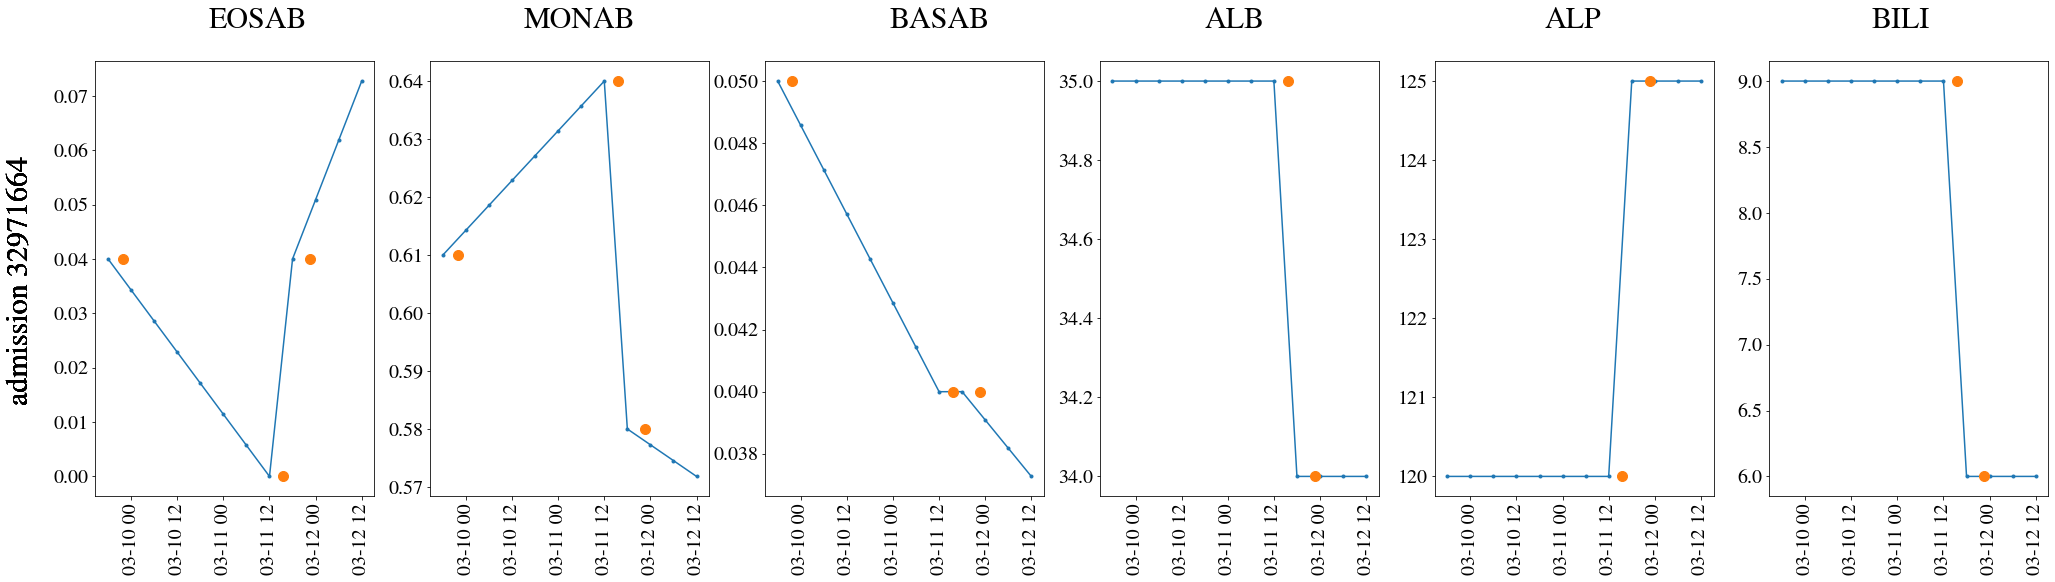

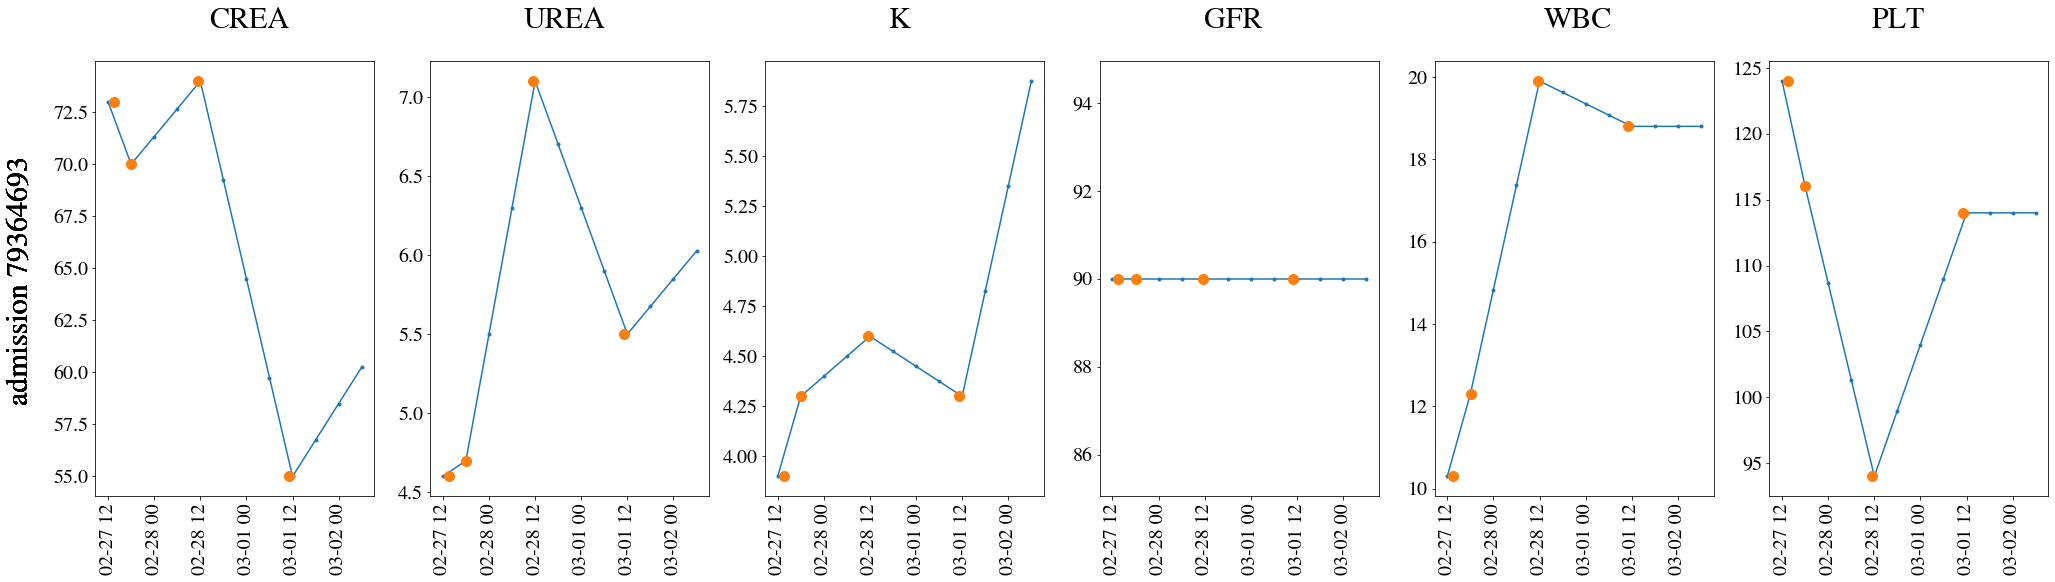

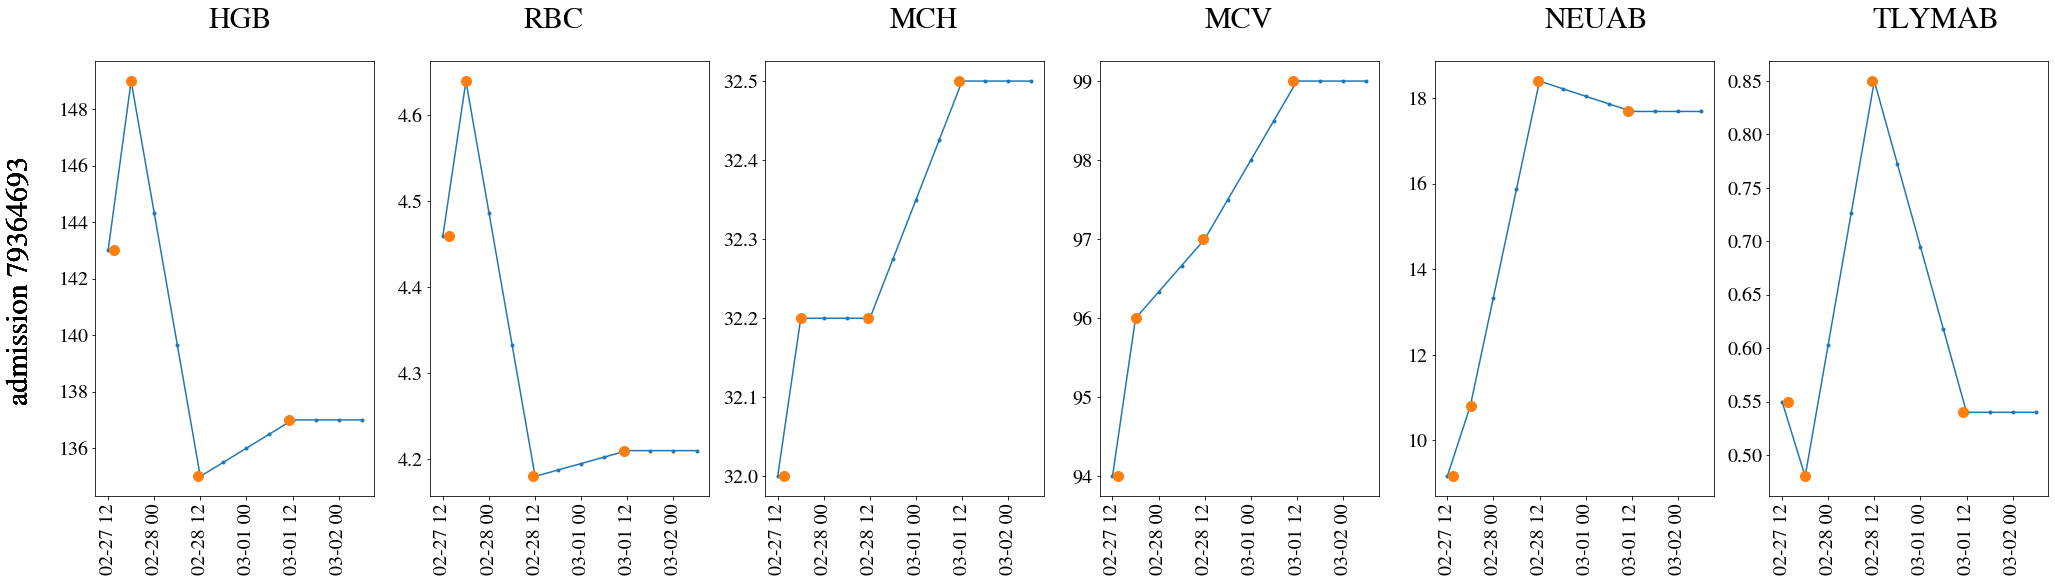

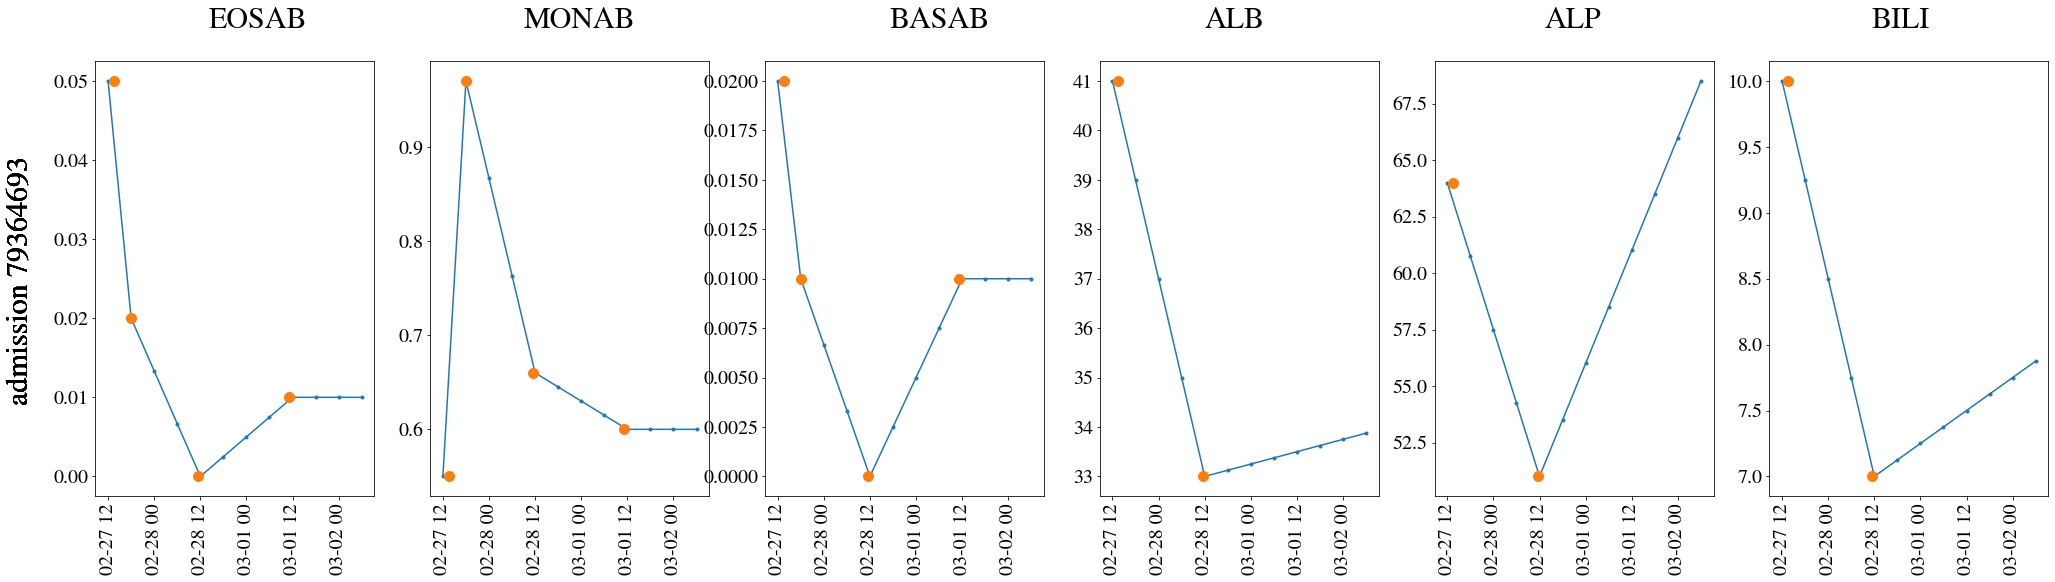

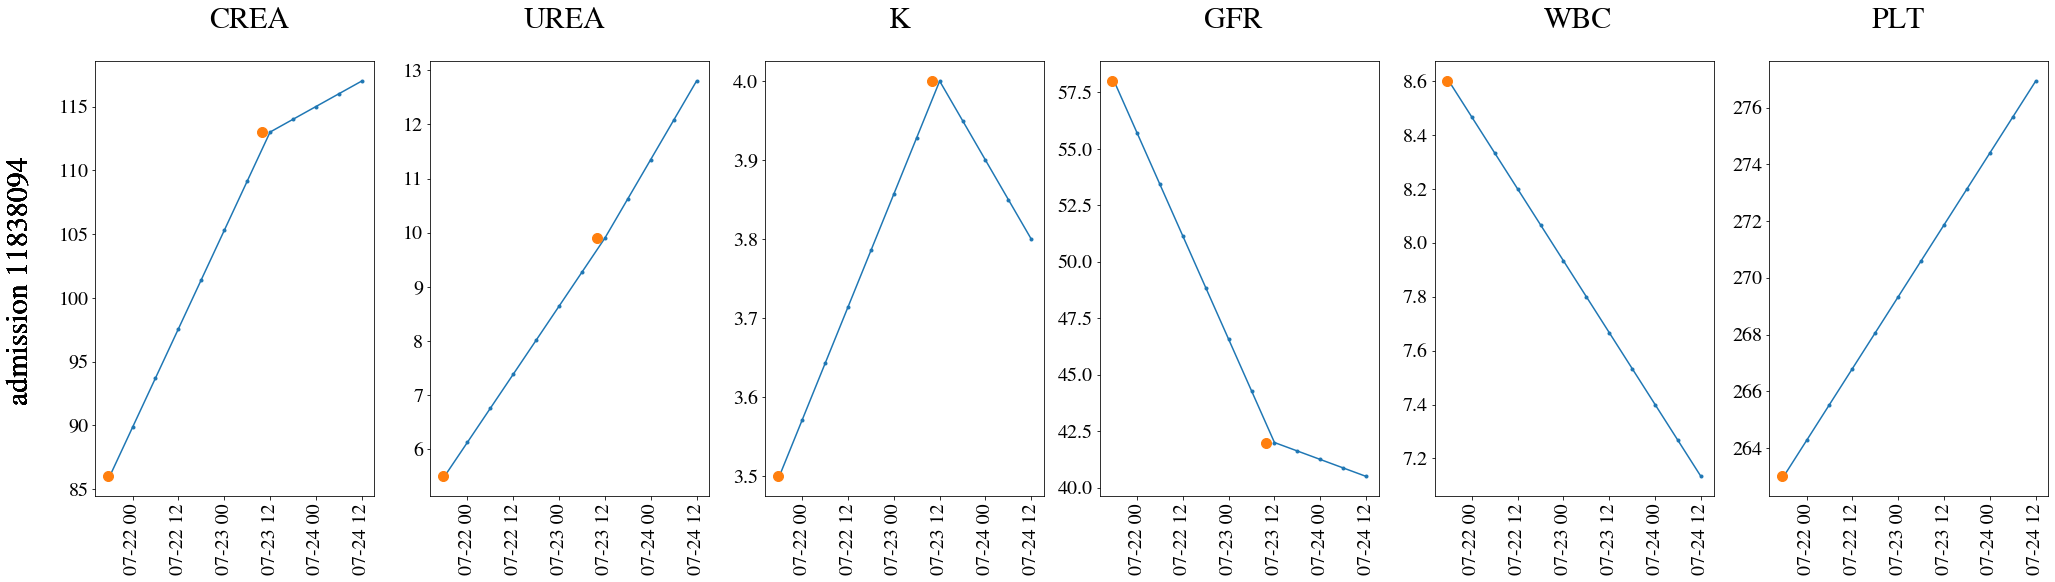

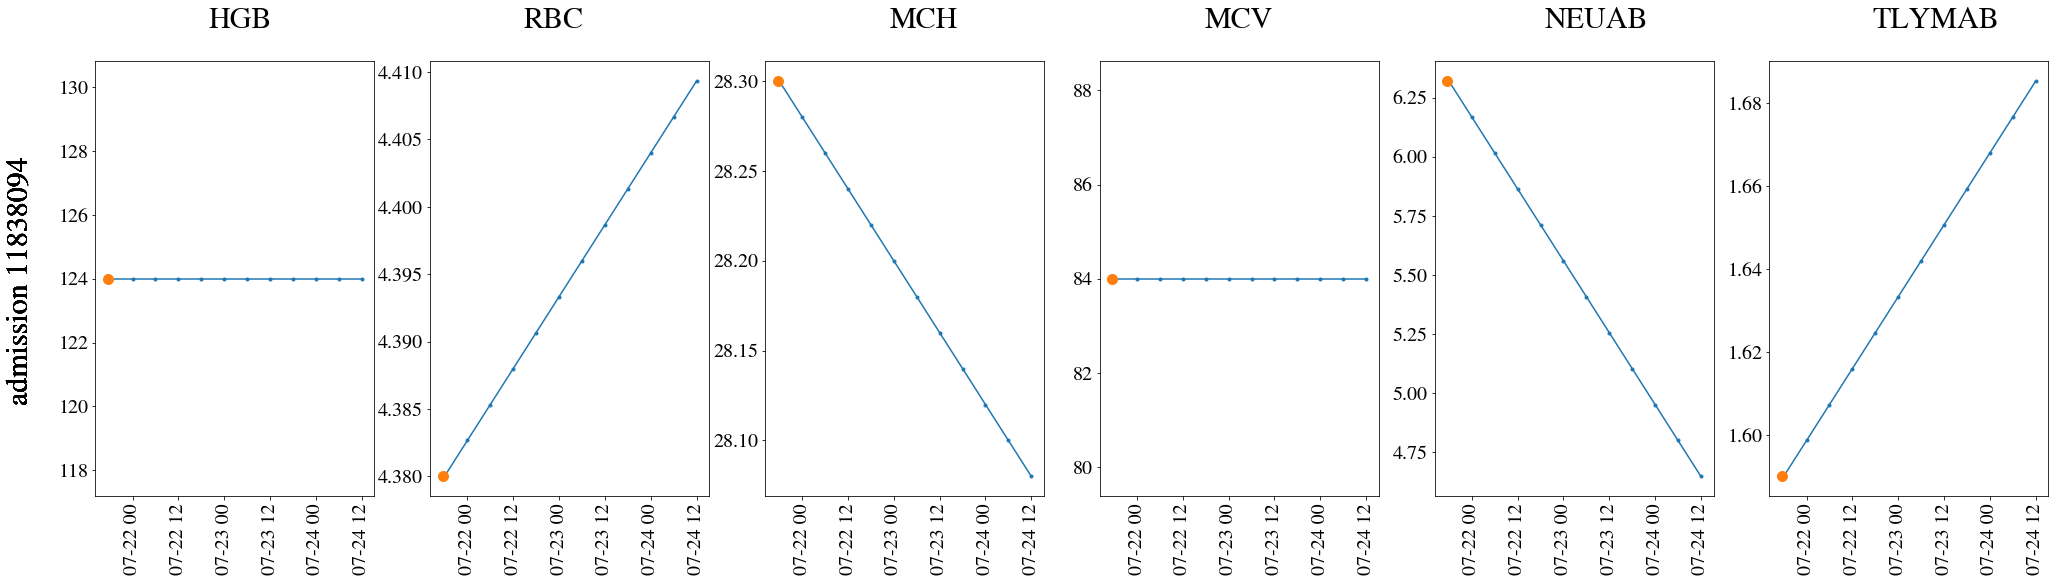

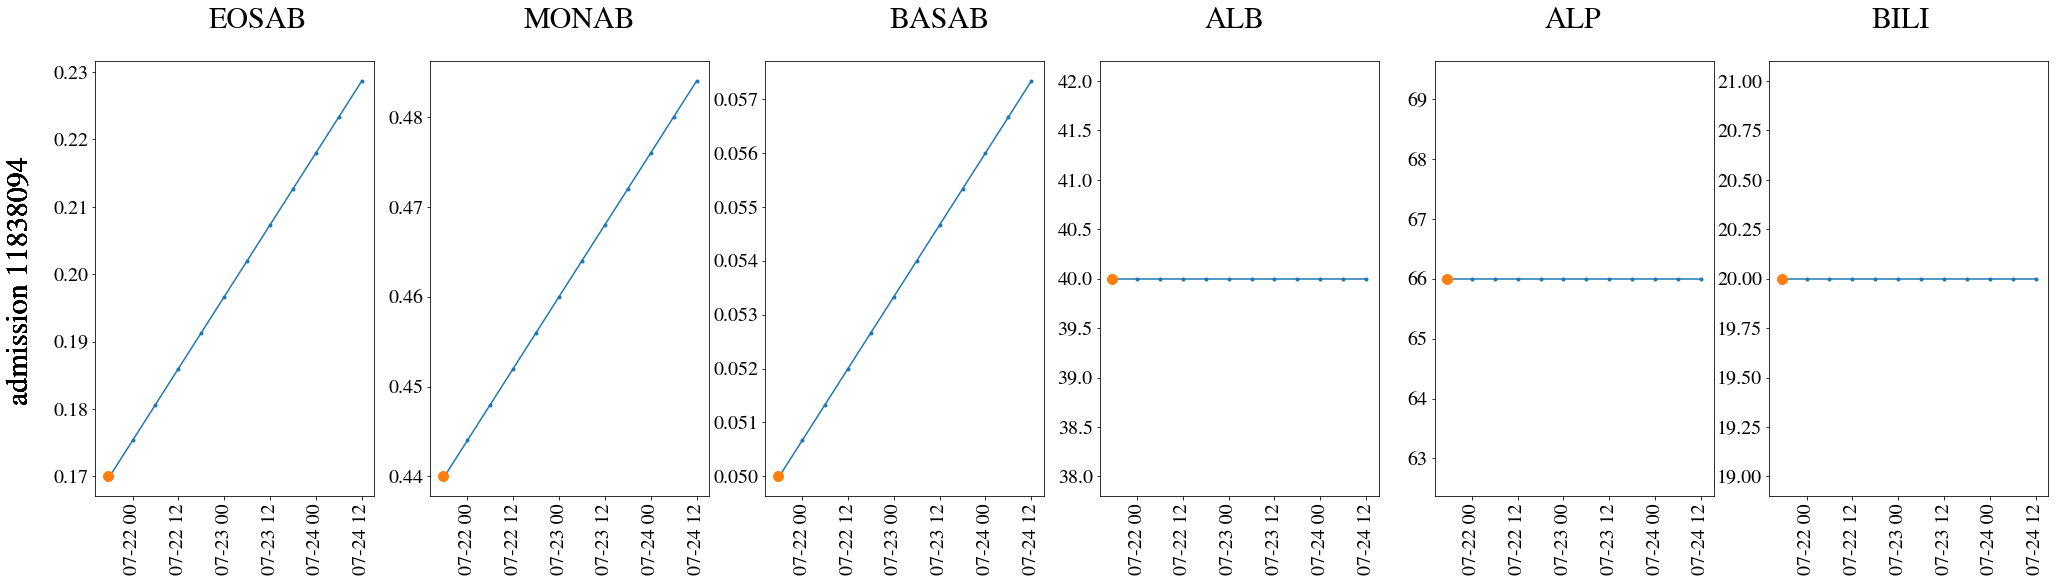

In [16]:

n_plots = 9
admns = df_haematology_new['admission_id'].unique().tolist()
idx_adm = random.sample(range(len(admns)), n_plots)

for i, idx in enumerate(idx_adm):
    adm_no = admns[idx]
    plot_eobs_admin(adm_no, dct_lbl_1, save = True)
    plot_eobs_admin(adm_no, dct_lbl_2, save = True)
    plot_eobs_admin(adm_no, dct_lbl_3, save = True)
    